<h1>Выявление профилей потребления</h1>

Материалы:
* [Презентация](https://yadi.sk/i/Fgm99KG7I3AfDA)
* [Дашборд](https://public.tableau.com/profile/valeriya5713#!/vizhome/-_16121131506690/Dashboard1?publish=yes)

Цель проекта:
* Сегментировать покупателей по профилю потребления.

Задачи:
* Исследовать данные
* Сегментировать покупателей
* Сформулировать и проверить статистические гипотезы

1. [Открытие данных](#start) 
2. [Предобработка данных](#preprocessing)
    * [Изменение типов данных](#types)
    * [Поиск и обработка пропущенных значений](#null)
    * [Поиск и обработка дубликатов](#duplicates)
    * [Лемматизация столбца с продуктами для более удобного разделения их на группы](#lemma)
3. [RFM-анализ](#rfmanalysis)
    * [Общее колчество покупок за период, количество покупок на одного уникального пользователя, среднее количество покупок на одного уникального пользователя](#ordersperusers)
    * [Общий чек за данный промежуток времени, чек на пользователя, средний чек](#revevnue)
    * [Категории продуктов](#typesofproducts)
    * [RFM-analysis](#RFM)
4. [Вывод](#conclusion)

<a id='start'></a>
<h2> Шаг 1.Изучение файлов с данными и общей информацией по ним</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go
from pymystem3 import Mystem

from ipywidgets import interact
import warnings

In [2]:
path = ('/Users/valeriyaniskorodova/Y.Praktikum/Final/')
#path = ('/datasets/')

In [3]:
ecommerce_data = pd.read_csv(path+'ecommerce_dataset.csv')

In [4]:
ecommerce_data

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [5]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Видно, что:
* Столбец с датой нужно привести к типу datetime
* Столбец order_id к типу object

<a id='preprocessing'></a>
<h2> Шаг 2.Предобработка данных</h2>

<a id='null'></a>
Пропущенных данных в таблице нет.

<a id='types'></a>
**Изменение типов данных**

In [6]:
ecommerce_data


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [7]:
ecommerce_data['date'] = pd.to_datetime(ecommerce_data['date'], format='%Y%m%d%H')

In [8]:
ecommerce_data

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [9]:
ecommerce_data['order_id'] = ecommerce_data['order_id'].astype('str')

In [10]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   object        
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 315.9+ KB


<a id='duplicates'></a>

In [11]:
ecommerce_data[['date','customer_id', 'order_id', 'quantity', 'price']].duplicated().sum()

2201

<a id='duplicates'></a>
Если искать дубликаты, включая столбец product, то их совсем не будет. Так как один товар в данной таблице может быть записан совершенно по-разному. При исключении названия столбца, у меня получается 2201 дубликатов. Но, замечу одну особенность, что один пользователь может купить несколько разных товаров, при этом его order_id будет один и тот же, так как покупка совершается в одно время, например. Удалять такие данные на данном этапе нецелесообразно, так как это 32% данных, да и точно быть уверенным в том, что это дубликаты тоже нельзя. 

In [12]:
ecommerce_data['order_value'] = ecommerce_data['quantity']*ecommerce_data['price']

In [13]:
ecommerce_data

,date,customer_id,order_id,product,quantity,price,order_value
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0
...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,397.0


<a id='rfmanalysis'></a>
<h2>Шаг 3.RFM-анализ</h2>

In [14]:
(ecommerce_data['date'].max() - ecommerce_data['date'].min())/np.timedelta64(1, 'M')

12.999582469181433

In [15]:
ecommerce_data['date'].min()

Timestamp('2018-10-01 00:00:00')

In [16]:
ecommerce_data['order_id'].nunique()

2784

За почти 13 месяцев было совершенно 2784 покупки.

In [17]:
ecommerce_data['customer_id'].nunique()

2451

Также за данный период 2451 пользователь совершил покупку на сайте.

In [130]:
def plot(n):
    sns.histplot(ecommerce_data['price'])
    
    plt.grid(True)
    plt.xlim(0, n)
    plt.xlabel('Цена')
    plt.ylabel('Частота появления переменной')
interact(plot, n =3000)
plt.show()

interactive(children=(IntSlider(value=3000, description='n', max=9000, min=-3000), Output()), _dom_classes=('w…

Из гистограммы видно, что чаще всего покупают товары в пределах 250 рублей. Товары с большой ценной имеют меньший спрос.

In [20]:
ecommerce_data['customer_id'].nunique() / ecommerce_data['order_id'].nunique()

0.8803879310344828

В среднем на одного пользователя выходит почти 1 покупка.

In [21]:
ecommerce_data['order_value'].sum() / ecommerce_data['order_id'].nunique()

1742.557471264368

В среднем один пользователь приносит 1742 рублей.

---

In [22]:
unique_orders = ecommerce_data.groupby('customer_id', as_index=False).agg({'order_id':'nunique',\
                                                                           'order_value':'sum'})
unique_orders.rename(columns={'order_id':'number_of_orders', 'order_value':'revenue'}, inplace=True)
unique_orders.sort_values(by='number_of_orders', ascending=False).head(10)

,customer_id,number_of_orders,revenue
1916,c971fb21-d54c-4134-938f-16b62ee86d3b,126,166988.0
742,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,60828.0
1101,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,21713.0
1748,b7b865ab-0735-407f-8d0c-31f74d2806cc,7,3779.0
17,0184f535-b60a-4914-a982-231e3f615206,5,7707.0
1820,bea7a833-2074-42db-bc49-4457abd3c930,4,4409.0
2147,e0535076-6270-4df2-8621-cb06264a94fa,4,636.0
699,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4,41900.0
1184,7d0641a6-e043-487d-b356-38895fe7df84,3,522.0
2307,f163e581-59ba-4022-99db-e0973c7497c0,3,2511.0


In [23]:
ecommerce_data.groupby('customer_id', as_index=False).agg({'date':'nunique', 'order_value':'sum'}).\
sort_values(by='date', ascending=False).head(10)

,customer_id,date,order_value
1916,c971fb21-d54c-4134-938f-16b62ee86d3b,117,166988.0
287,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,74,114750.0
833,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,60,65220.0
742,4d93d3f6-8b24-403b-a74b-f5173e40d7db,33,60828.0
1327,8c290149-ad54-4d7a-87a7-9386b36390ee,23,2024.0
1101,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,21713.0
1639,ae6940d3-a1c7-4997-8853-a5b8afc60d51,16,32382.0
940,63b6c7b2-f6c2-4a42-ba02-1910ec67f57e,10,6370.0
1636,ae39cf6e-335b-498b-8896-c9330756f56c,9,1413.0
2234,eb04c06f-bee9-45bd-9392-4addbc54952f,9,12030.0


Есть довольно выбивающийся покупатель, посмотрим на данные с ним. Он сделал 126 заказов.

Покупатель *c971fb21-d54c-4134-938f-16b62ee86d3b*

In [24]:
ecommerce_data[ecommerce_data['customer_id'] == 'c971fb21-d54c-4134-938f-16b62ee86d3b']['product'].unique()

array(['Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379',
       'Чехол для гладильной доски Festival 137x60 см из хлопка 4738',
       'Набор прищепок большие пластиковые ROZENBAL ПИНОККИО 10 шт R102312',
       'Сушилка для белья Attribute ПРИМА 11 м синяя напольная ADP410',
       'Тележка багажная DELTA ТБР-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас РОССИЯ',
       'Готовая скатерть Ажурная Dia Rose круглая д.152 белая, 5173, Towa Co., LTD',
       'Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м',
       'Таз пластмассовый 18,0 л квадратный (ТП-18) "Пластхозторг", 1404042',
       'Стяжка оконная с болтом СТ-55 цинк, 1108354',
       'Сумка-тележка 3-х колесная Gimi Tris Floral синяя',
       'Сумка-тележка хозяйственная Andersen Scala Shopper, Elba, черная 112-051-80',
       'Герань домашняя (пеларгония зональная) цветущая , D12, H25-30, красная, махровая',
       'Герань домашняя (пеларгония зональная) цветуща

По набору заказываемых товаров из магазина можно сделать вывод, что данный покупатель является логистом в отеле или гостевом доме. Даннные являются выбросами, но удалять их - потеря важной информации, так как данный покупатель делает больше всего покупок на нашем сайте.


In [25]:
unique_orders['number_of_orders'].mode()

0    1
dtype: int64

Несмотря на некоторых пользователей, которые являются частыми покупателями, боьшинство пользователей делают всего 1 покупку на сайте.


Также проверю зависимость идентификатора покупателя от даты на примере того покупателя, который сделал 126 заказов.

In [26]:
test = ecommerce_data[ecommerce_data['customer_id'] == 'c971fb21-d54c-4134-938f-16b62ee86d3b']
test.groupby('order_id').agg({'date':'nunique'}).sort_values(by='date', ascending=False).head()

,date
order_id,
70140,2
68480,1
70093,1
70082,1
70060,1


In [27]:
ecommerce_data[(ecommerce_data['customer_id'] == 'c971fb21-d54c-4134-938f-16b62ee86d3b') &\
               (ecommerce_data['date'] == '2018-12-10 08:00:00')]

,date,customer_id,order_id,product,quantity,price,order_value
1146,2018-12-10 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69272,Штора для ванной комнаты ПВХ Sfera 240х200 см ...,2,937.0,1874.0
1147,2018-12-10 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69273,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1049.0,1049.0
1148,2018-12-10 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69274,Миска пластмассовая круглая Пластхозторг S-706...,6,44.0,264.0


Получается одному заказу, сделанному в разное время, но в один день, был присвоен один идентификатор. Если взглянуть на таблицу этого пользователя, то можно заметить, что есть дни, когда заказ был совершен в разное время и идентификатор присвоен для двух заказов разный. Такая ошибка присваивания может быть, а может даже не ошибка,а ,например, дозаказ от пользователя или замена похожим товаром, если нужного нет на складе, такие данные удалят не стоит, они не являются дубликатами.

---

In [28]:
ecommerce_data[(ecommerce_data['customer_id'] == 'c971fb21-d54c-4134-938f-16b62ee86d3b') &\
               (ecommerce_data['order_id'] == '70140')]

,date,customer_id,order_id,product,quantity,price,order_value
1729,2019-02-07 12:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70140,Контейнер для мусора ДОМИНИК CURVER 25 л сереб...,10,748.0,7480.0
1730,2019-02-07 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70140,Контейнер для мусора ДОМИНИК CURVER 25 л сереб...,10,748.0,7480.0


In [29]:
error_date = ecommerce_data.groupby(['order_id', 'customer_id'], as_index=False).agg({'date':'nunique'})

error_date.sort_values(by='date', ascending=False)

,order_id,customer_id,date
221,14833,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,74
1675,70960,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,60
729,69162,8c290149-ad54-4d7a-87a7-9386b36390ee,23
1772,71148,ae6940d3-a1c7-4997-8853-a5b8afc60d51,16
1384,70419,63b6c7b2-f6c2-4a42-ba02-1910ec67f57e,10
...,...,...,...
975,69611,bc36411d-ab04-436f-87a5-e866a516508a,1
976,69612,c971fb21-d54c-4134-938f-16b62ee86d3b,1
978,69614,b7a09661-dca8-4fca-acf1-9c31a2bbf8ca,1
979,69616,c971fb21-d54c-4134-938f-16b62ee86d3b,1


In [30]:
error_date[error_date['date'] != 1].count()

order_id       265
customer_id    265
date           265
dtype: int64

265 случаев, когда order_id встречается для одного пользователя несколько раз.

Если отталкиваться от того, что идентификатор присваивается после оплаты заказа, то не может быть, чтобы на один продукт из одного заказа приходилось несколько  разных дат, что означает, что такие данные являются дубликатами.

In [31]:
first_customer = ecommerce_data[ecommerce_data['customer_id'] == '1d6c8c1f-a799-4418-9af2-1ded47d7a85c'].\
groupby(by=['order_id','product'], as_index=False).agg({'quantity':'sum'})
first_customer.rename(columns={'quantity':'number_of_product'}, inplace=True)
first_customer

,order_id,product,number_of_product
0,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",75
1,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,75
2,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",75
3,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,75
4,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,75
5,14833,"Рассада Кабачка сорт Сосновский, кассета по 6шт",75
6,14833,Рассада Огурец Кристина ячейки по 6 шт Е6,75
7,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,75
8,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,75
9,14833,"Рассада Патиссона сорт Диск, кассета по 6шт",75


Интересно еще то, что частота покупки продукта у некоторых покупателей одинаковая, что может говорит о том, что это техническая ошибка, возникшая во время записи или передачи данных.

In [32]:
second_customer = ecommerce_data[ecommerce_data['customer_id'] == 'db77c238-3c80-4032-9e3c-c30a43f4a650'].\
groupby(by=['order_id','product'], as_index=False).agg({'quantity':'sum'})
second_customer.rename(columns={'quantity':'number_of_product'}, inplace=True)
second_customer

,order_id,product,number_of_product
0,14835,Бакопа ампельная махровая белая махровая объем...,7
1,14835,Бакопа ампельная махровая сиреневая махровая о...,7
2,14835,Бакопа ампельная махровая фиолетовая махровая ...,7
3,14835,"Бакопа ампельная мега-крупная белая объем 0,5 л",7
4,14835,"Бакопа ампельная мега-крупная розовая объем 0,5 л",7
5,14835,"Бакопа ампельная мега-крупная синяя объем 0,5 л",7
6,14835,Бакопа ампельная мега-крупная сиреневая объем ...,7
7,14835,"Бакопа ампельная, диам. 12 см",7
8,14835,"Барвинок синий объем 0,5 л",7
9,14835,Вербейник монетчатый желты,7


У данного пользователя не со всеми продуктами такая ситуация. Этот анализ дает понять, что надо удалять дубликаты, котоыре возникают с столбцах с order_id и product. И посмотреть на данные после их удаления.

In [33]:
ecommerce_data.drop_duplicates(subset=['customer_id','order_id', 'product'], inplace=True)

In [34]:
ecommerce_data.shape

(4851, 7)


28% данных удалены. О такой ошибке стоит сообщить, так как ее обнаружить не так просто.

----

In [35]:
ecommerce_data['order_id'].nunique()

2784

In [36]:
ecommerce_data['customer_id'].nunique()

2451

При этом количество уникальных покупок и покупателей не изменилось.

----

In [37]:
'{} рублей - выручка, которую интернет-магазин получил за данный период'.format(ecommerce_data['order_value']\
                                                                                .sum())

'4130611.0 рублей - выручка, которую интернет-магазин получил за данный период'

In [134]:
def plot(n):
    sns.histplot(ecommerce_data['price'], bins=200)
    plt.grid(True)
    plt.xlim(0, n)
    plt.title('Частота покупок товаров определенной цены')
    plt.xlabel('Цена')
    plt.ylabel('Частота появления переменной')
interact(plot, n =3000)
plt.show()

interactive(children=(IntSlider(value=3000, description='n', max=9000, min=-3000), Output()), _dom_classes=('w…

Гистограмма также не изменилась. Чаще всего покупают товары до 250 рублей.

In [39]:
unique_orders_new = ecommerce_data.groupby('customer_id', as_index=False).agg({'order_id':'nunique',
                                                                               'order_value':'sum'})
unique_orders_new.rename(columns={'order_id':'number_of_orders', 'order_value':'revenue'}, inplace=True)
unique_orders_new.sort_values(by='number_of_orders', ascending=False).head(5)

,customer_id,number_of_orders,revenue
1916,c971fb21-d54c-4134-938f-16b62ee86d3b,126,159508.0
742,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,57278.0
1101,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,21361.0
1748,b7b865ab-0735-407f-8d0c-31f74d2806cc,7,3779.0
17,0184f535-b60a-4914-a982-231e3f615206,5,5891.0


In [40]:
ecommerce_data.groupby('customer_id', as_index=False).\
agg({'date':'nunique', 'order_value':'sum'}).\
sort_values(by='date', ascending=False).head(10)

,customer_id,date,order_value
1916,c971fb21-d54c-4134-938f-16b62ee86d3b,116,159508.0
742,4d93d3f6-8b24-403b-a74b-f5173e40d7db,32,57278.0
1101,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,16,21361.0
1748,b7b865ab-0735-407f-8d0c-31f74d2806cc,7,3779.0
17,0184f535-b60a-4914-a982-231e3f615206,6,5891.0
1184,7d0641a6-e043-487d-b356-38895fe7df84,3,522.0
2209,e8204583-4d55-4724-ad3f-049c7db43bdd,3,3102.0
131,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,3,1538.0
2140,dfbcfde5-21de-4504-aff4-453e617d81c1,3,2804.0
1006,6a86cc77-ef15-496f-b5d3-89005597ee5d,3,3151.0


Рассмотрю еще нескольких покупателей, которые находятся в топ-5 по количеству покупок и частоте покупки.

In [41]:
ecommerce_data[ecommerce_data['customer_id'] == '4d93d3f6-8b24-403b-a74b-f5173e40d7db']

,date,customer_id,order_id,product,quantity,price,order_value
12,2018-10-01 13:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,187.0
21,2018-10-02 10:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68491,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1049.0,1049.0
42,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 3-х рядная деревянная 450 мм (пло...,15,49.0,735.0
43,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 4-х рядная деревянная 300 мм (фиг...,15,70.0,1050.0
46,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Вилка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...",1,187.0,187.0
47,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...",1,202.0,202.0
48,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка чайная RIPPLE сталь 2,5 мм, 3 шт, Attrib...",1,142.0,142.0
49,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Нож столовый RIPPLE 80 г 2 шт, Attribute, ACR042",1,172.0,172.0
50,2018-10-02 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68506,Герань домашняя (пеларгония зональная) цветуща...,11,142.0,1562.0
70,2018-10-03 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68516,Сушилка для белья потолочно-настенная Gimi Lif...,1,1649.0,1649.0


Учитывая то, некоторые товары были куплены большом количестве, то можно сделать вывод, что этот пользователь является работником гостинечного бизнеса, но в меньшем масштабе. Например, сдача нескольких комнат или квартир.

In [42]:
ecommerce_data[ecommerce_data['customer_id'] == '73d1cd35-5e5f-4629-8cf2-3fda829d4e58']

,date,customer_id,order_id,product,quantity,price,order_value
6500,2019-10-02 15:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72836,Чайник электрический ВАСИЛИСА Т31-2000 нержаве...,1,704.0,704.0
6533,2019-10-07 09:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72881,Хризантема сиреневая d-18 см,1,187.0,187.0
6534,2019-10-07 10:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72883,"Кипятильник электрический 2.5 КВт, 1601143",1,224.0,224.0
6537,2019-10-07 16:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72889,Чайник электрический ВАСИЛИСА Т28-1800 нержаве...,1,749.0,749.0
6563,2019-10-10 10:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72913,Стремянка COLOMBO FACTOTUM 4 ступени стальная ...,1,2849.0,2849.0
6610,2019-10-15 09:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72967,Тележка багажная DELTA DT-22 синий грузоподъем...,1,674.0,674.0
6625,2019-10-16 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72983,Сумка-тележка хозяйственная GIMI Ideal синяя,1,1649.0,1649.0
6626,2019-10-16 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72986,Сумка-тележка хозяйственная Rolser MNB012 azul...,1,6600.0,6600.0
6631,2019-10-16 16:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72993,"Таз пластмассовый 30,0 л овальный ПЦ2913, 1404051",1,404.0,404.0
6632,2019-10-16 17:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72996,Контейнер для мусора FLIP BIN CURVER 25 л граф...,1,824.0,824.0


Данный пользователь похож на предыдущего, но его закупки немного отличаются. Во-первых количеством, а во-вторых такой набор может быть у тех людей, которые предоставляют временное жилье для строителей, например.

In [43]:
ecommerce_data[ecommerce_data['customer_id'] == 'b7b865ab-0735-407f-8d0c-31f74d2806cc']

,date,customer_id,order_id,product,quantity,price,order_value
1835,2019-02-15 10:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14538,Пеларгония розоцветная РЕД РОЗЕБУД молодые рас...,1,90.0,90.0
2019,2019-02-25 14:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14549,Пеларгония зональная диам. 12 см белая махровая,1,150.0,150.0
2020,2019-02-25 14:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14549,Пеларгония зональная диам. 12 см малиновая мах...,1,150.0,150.0
2034,2019-02-26 12:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14550,Пеларгония розебудная Mary укорененный черенок,1,135.0,135.0
2035,2019-02-26 12:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14550,Пеларгония розебудная Prins Nikolai укорененны...,1,135.0,135.0
2628,2019-04-03 16:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14611,Рассада томата (помидор) Иоген № 77 сорт детер...,5,38.0,190.0
2629,2019-04-03 16:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14611,Рассада томата (помидор) Ола Полка № 96 сорт д...,5,38.0,190.0
2630,2019-04-03 16:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14611,Рассада томата (помидор) Шаймет криг № 117 сор...,10,38.0,380.0
2631,2019-04-03 16:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14611,Рассада томата (помидор) Эфемер № 121 сорт дет...,10,38.0,380.0
2656,2019-04-04 11:00:00,b7b865ab-0735-407f-8d0c-31f74d2806cc,14615,"Бакопа ампельная мега-крупная белая объем 0,5 л",1,82.0,82.0


Тут сразу видно, что покупатель является садоводом. По количеству купленного товара, скорее всего, он выращивает овощи и цветы для себя, не для бизнеса.

In [44]:
unique_orders_new.sort_values(by='revenue', ascending=False).head(7)

,customer_id,number_of_orders,revenue
469,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,1,675000.0
1916,c971fb21-d54c-4134-938f-16b62ee86d3b,126,159508.0
742,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35,57278.0
839,58a4c3cc-504f-43ea-a74a-bae19e665552,2,53232.0
199,146cd9bf-a95c-4afb-915b-5f6684b17444,1,49432.0
699,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4,41900.0
1360,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,1,33680.0


Также есть пользователи, которые делают 1 заказ на большую сумму(4 место в таблице, если делать сортировку по выручке с одного пользователя), но, как я говорила в начале, данный заказ может представлять из себя совокупность товаров, купленных в одну сессию ( такой заказ будет иметь один order_id)



In [45]:
ecommerce_data[ecommerce_data['customer_id'] == '9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f']

,date,customer_id,order_id,product,quantity,price,order_value
416,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Вешалка деревянная с расширенными плечиками и ...,8,262.0,2096.0
417,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Вешалка для блузок 41 см черный Attribute AHM791,9,50.0,450.0
418,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Вешалка с закругленными плечиками без переклад...,7,106.0,742.0
419,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Гладильная доска Sarayli Tamara 125x42 см,1,3074.0,3074.0
420,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Коврик влаговпитывающий ребристый 50х80 см Ста...,1,299.0,299.0
421,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Коврик влаговпитывающий ребристый 60х90 см Ста...,1,412.0,412.0
422,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Коврик придверный грязеулавливающий резиновый ...,1,284.0,284.0
423,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"Короб стеллажный с крышкой большой, 30*40*25 с...",1,674.0,674.0
424,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"Короб стеллажный с крышкой малый, 28*30*16 см,...",3,524.0,1572.0
425,2018-10-26 13:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,Коробка для хранения на молнии из синтетическо...,1,749.0,749.0


По количеству заказов данный покупатель приобретал товар для своего дома.

In [46]:
ecommerce_data[ecommerce_data['customer_id'] == '0d87f4ae-465a-4fac-81e6-5d629761783e']

,date,customer_id,order_id,product,quantity,price,order_value
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0,14917.0


In [47]:
ecommerce_data[ecommerce_data['customer_id'] == '639c4989-b0ab-412a-b7ec-be394cb2d372']

,date,customer_id,order_id,product,quantity,price,order_value
634,2018-11-05 02:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68856,Сумка-тележка хозяйственная Rolser IMX005 mare...,1,6007.0,6007.0
648,2018-11-05 21:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68870,"Шнур резиновый для тележки 110 см, 1209002",1,44.0,44.0
649,2018-11-05 21:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68870,"Шнур резиновый для тележки 80 см, 1209001",1,37.0,37.0
655,2018-11-05 22:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68871,Сумка-тележка хозяйственная Rolser IMX005 mare...,1,6007.0,6007.0


Замечу, что покупатели, которые сделали заказ за одну сессию или несколько заказов в один день, скорее всего приобретали товары для собственного пользования.

---

Посмотрю, сколько товаров может быть в одном заказе.

In [48]:
product_per_order = ecommerce_data.groupby(['customer_id', 'order_id'], as_index=False).\
agg({'product':'count', 'order_value':'sum'})
product_per_order.rename(columns={'product':'item_per_order', 'order_value':'revenue'}, inplace=True)
product_per_order

,customer_id,order_id,item_per_order,revenue
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,4,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,70290,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,72965,1,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,1,2324.0
...,...,...,...,...
2812,ff601403-b094-4b86-9ac6-264d725b9277,72313,1,1649.0
2813,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,1,397.0
2814,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,69369,1,389.0
2815,ffb80538-3fda-4351-8ea9-9d2bec58bb07,72561,1,974.0


In [137]:
def plot(n):
    sns.histplot(product_per_order['item_per_order'], bins=400)
    plt.xlim(0, n)
    plt.grid(True)
    plt.title('Количество покупок в заказе')
    plt.xlabel('Количество покупок в одном заказе')
    plt.ylabel('Частота появления переменной')
interact(plot, n =17)
plt.show()

interactive(children=(IntSlider(value=17, description='n', max=51, min=-17), Output()), _dom_classes=('widget-…

Рассмотрю первую тройку покупателей с наибольшим количеством купленного товара за один заказ.

---

In [50]:
product_per_order.sort_values(by='item_per_order', ascending=False).head()

,customer_id,order_id,item_per_order,revenue
2345,d3b9ffea-d143-4747-8d59-74ab843d1ad6,14698,51,2922.0
1251,760aa067-90c3-4794-b7a9-a8831197388b,14715,36,4558.0
418,2a0acc09-e343-4f92-b5c0-f598ef2b07d4,14688,31,2280.0
629,3d5fef90-4a65-4a7e-84cf-010eba7b038d,14753,30,1210.0
1012,603e92a4-fc7f-4203-9ca5-103da5b008ac,14705,29,3776.0


Пользователь *d3b9ffea-d143-4747-8d59-74ab843d1ad6*

In [51]:
first_customer = ecommerce_data[ecommerce_data['customer_id'] == 'd3b9ffea-d143-4747-8d59-74ab843d1ad6'].\
groupby(by=['order_id','product'], as_index=False).agg({'quantity':'sum'})
first_customer.rename(columns={'quantity':'number_of_product'}, inplace=True)
first_customer

,order_id,product,number_of_product
0,14698,Земляника садовая Хоней d-9 см P9,1
1,14698,"Колокольчик персиколистный белый объем 0,5 л",1
2,14698,Пиретрум Робинсон красный объем 1 л,1
3,14698,Рассада зелени для кухни Лаванда Блю Райдер ди...,1
4,14698,Рассада зелени для кухни Лаванда Прованc диам....,1
5,14698,Рассада зелени для кухни Лаванды в горшке диам...,1
6,14698,Рассада зелени для кухни Розмарина в горшке ди...,1
7,14698,Рассада клубники Зенга Зенгана в кассете по E6,1
8,14698,Рассада клубники Зенга Зенгана горшок 9х9 см P9,1
9,14698,"Флокс метельчатый сорт МОСКВИЧКА, диаметр горш...",1


Так как каждой рассады покупатель приобрел по 1 единице, то скорее всего он выращивает овощи и цветы для себя
___

Пользователь *760aa067-90c3-4794-b7a9-a8831197388b*

In [52]:
second_customer = ecommerce_data[ecommerce_data['customer_id'] == '760aa067-90c3-4794-b7a9-a8831197388b'].\
groupby(by=['order_id','product'], as_index=False).agg({'quantity':'sum'})
second_customer.rename(columns={'quantity':'number_of_product'}, inplace=True)
second_customer

,order_id,product,number_of_product
0,14715,Бакопа ампельная махровая белая махровая объем...,1
1,14715,Бакопа ампельная махровая фиолетовая махровая ...,1
2,14715,"Бакопа ампельная мега-крупная розовая объем 0,5 л",1
3,14715,"Вербена Red красная объем 0,5 л",1
4,14715,Декабрист в горшке D12 белый с розовой каймой,1
5,14715,Декабрист в горшке D12 красный,1
6,14715,Декабрист в горшке D12 малиновый,1
7,14715,Калибрахоа Aloha Double Purple сиреневая махро...,1
8,14715,Калибрахоа Mini Famous Double Red красная махр...,1
9,14715,Калибрахоа Rave Violet сиреневая звезда объем ...,1


Аналогичная ситуация с первым покупателем.

---

Пользователь *2a0acc09-e343-4f92-b5c0-f598ef2b07d4*

In [53]:
third_customer = ecommerce_data[ecommerce_data['customer_id'] == '2a0acc09-e343-4f92-b5c0-f598ef2b07d4'].\
groupby(by=['order_id','product'], as_index=False).agg({'quantity':'sum'})
third_customer.rename(columns={'quantity':'number_of_product'}, inplace=True)
third_customer

,order_id,product,number_of_product
0,14688,"томата (помидор) ""Золотая канарейка"" №32 сорт ...",3
1,14688,томата (помидор) Амурский тигр № 8 сорт детерм...,1
2,14688,томата (помидор) Арбузный №5 сорт индетерминан...,3
3,14688,томата (помидор) Баскью Блю №7 сорт детерминан...,3
4,14688,томата (помидор) Болгарска хала №9 сорт индете...,1
5,14688,томата (помидор) Большая желтая зебра №10 сорт...,2
6,14688,томата (помидор) Большой оранжевый полосатый №...,2
7,14688,томата (помидор) Большой оранжевый №11 сорт ин...,2
8,14688,томата (помидор) Гигант Кубы №18 сорт индетерм...,2
9,14688,томата (помидор) Голубика №22 сорт индетермина...,2


Данный покупатель приобрел 60 единиц разных сортов томатов. Вполне возможно он ведет свой малый бизнес по продаже томатов.

-----

Разделю товары на категории, для этого проведу лемматизацию столбца с именем продукта и по ключевым словам создам 3 группы продуктов.

In [54]:
m = Mystem()

In [55]:
ecommerce_data['lemmatize'] = ecommerce_data['product'].apply(m.lemmatize)

In [56]:
def product_group(row):
    product = row['lemmatize']
    #Функция возвращает общее название группы, если такое слово встречается в столбце с lemmatize
    if {'сумка', 'тележка', 'вешалка', 'сушилка', 'сковорода', 'крышка', 'метла', 'штора',\
        'светильник', 'ковер', 'веник', 'кисточка', 'выпечка', 'крючок',\
        'уголок', 'ручка', 'чайник', 'форма', 'столовый', 'прибор', 'мультиварка', 'запекание',\
        'миксер', 'миска', 'съемный', 'кофемолка', 'измельчитель', 'соковыжималка',\
        'мясорубка', 'нож', 'котел', 'овощеварка', 'кастрюля', 'варение', 'соковарка',\
        'посуда', 'чайный', 'кружка', ' фужер', 'салатник', 'кухонный', 'бокал', 'стакан',\
        'посуда', 'блюдо', 'противень', 'мантоварка', 'терка', 'вилка',\
        'ложка', 'измельчитель','орехоколка', 'сито', 'дуршлаг', 'кисточка', 'просеиватель',
        'половник', 'толкушка', 'лопатка', 'кондитерский', 'овощечистка', 'скалка',\
        'ножницы', 'венчик',  'пресс', 'лопатка', 'шило', 'пьезозажигалка',\
        'рыбочистка', 'электроштопор', 'бензин', 'измельчитель',  'тортница','сахарница',\
        'салфетница', 'масленка', 'кувшин', 'контейнер', 'блюдце',\
        'бульонница', 'миска', 'бульонница', 'фужер', 'термос', 'муляж', 'искусственный',\
        'декоративный', 'светильник', 'дуршлаг', 'яйцо', 'ваза', 'ерш', 'хранение','хранение',\
        'одежда', 'костюм', 'лоток', 'кофр', 'вещь', 'плечики', 'корзинка', 'корзина', 'комод',\
        'емкость', 'вакуумный', 'бак', 'держатель', 'штора', 'штанга', 'карниз', 'белье',\
        'зубной', 'сидение', 'пробка', 'потолочный', 'полка', 'губка', 'подголовник', \
        'мыльница', 'бак', 'мешок', 'комплект', 'карниз', 'дозатор', 'держатель', 'экран',\
        'шпагат', 'шнур', 'сварка', 'фиксатор', 'фал', 'уголок', 'электрический', 'терка',\
        'термометр', 'стяжка', 'ящик', 'щетка', 'вантуз', 'скатерть', 'пружина', 'горшок',\
        'бамбук','простыня', 'веник','табурет', 'салфетка', 'полка','мыло', 'табурет',\
        'постельный','подушка', 'одеяло', 'покрывало', 'плед', 'штора','плед','полотенце',\
        'наматрацник', 'халат','полотенце','коврик','сетка', 'обувь', 'чехол', 'таз',\
        'доска', 'тарелка', 'прищепок', 'перчатка', 'стремянка', 'термокружок', 'пена',\
        'крем', 'подрукавник', 'ткань', 'швабра', 'ведро', 'урна', 'фреза', 'свереть',\
        'наматрасник', 'ножеточка', 'совок', 'банка', 'паста', 'корыто', 'угольник', 'паста', \
        'тряпка', 'линейка', 'петля', 'блок', 'средство', 'фен', 'антижир', 'ковш',\
        'ополаскиватель', 'весы', 'термостакан', 'нструмент', 'фоторамка', 'ключница', \
        'картина', 'замок', 'посудомоечный', 'маска', 'хлебница','бидон', 'колокольчик',\
        'решетка', 'подставка', 'отбеливатель', 'отделитель', 'насадка', 'завертка',\
        'инструмент', 'искусственный', 'утюг', 'наволочка', 'этажерка', 'пододеяльник', \
        'скребок', 'обувница', 'сотейник', 'пуф', 'штангенциркуль'
       } & set(product):
        return 'Товары для дома' 
    if {'герань','тюльпан','нарцисс','крокус','ирис','гиппеаструм',\
        'гиацинт', 'h', 'd', 'ассортимент','амариллис','цимбидиум', 'фаленопсис','орхидея',\
       'онцидиум', 'мильтоний', 'мильтонидиум','каттлея', 'дендробиум','буррагеар','брассий',\
       'синнингия', 'платикодон', 'мединилла', 'комнатный','гортензия','глоксиния','гардения',\
        'афеляндр', 'подарочный', 'юкка','шеффлер', 'хризолидокарпус','хлорофитум',\
       'пеларгония', 'фикус', 'фатсия', 'пеперомия','пахира', 'мирт','арабика','фикус',\
       'нефролепис', 'замиокулькас','драцена', 'аспарагус', 'драцена', 'джункус','бегония',\
       'эхинокактус', 'суккулент', 'молодило','литопс', 'крассула', 'алоэ','гимнокалициум',\
       'адиантум','многолетний', 'цикламен', 'гвоздик', 'хризантема', 'крупноцветковый'} & set(product):
        return 'Комнатные расстения'
    if {'рассада', 'P', 'петуния', 'калибрахоа', 'кориандр', 'укроп', 'петрушка', 'томат',\
       'огурец', 'сельдерей', 'базилик', 'салат', 'капуста', 'морковь', 'косметь', 'г',\
       'гиностемма', 'однолетний', 'штука', 'шт', 'бакоп', 'флокс', 'эхинацея', 'л',\
       'клубника', 'дыня', 'вербена', 'арбуз', 'осина', 'вербейник', 'лобелия', 'ампельный',\
       'сантолина', 'пеларгония', 'иссоп'} & set(product):
        return 'Рассада и саженцы'
    else:
        return 'no'

In [57]:
ecommerce_data['new_group'] = ecommerce_data.apply(product_group, axis=1)

In [58]:
ecommerce_data

,date,customer_id,order_id,product,quantity,price,order_value,lemmatize,new_group
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,"[комнатный, , растение, , в, , горшок, , а...",Товары для дома
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,"[комнатный, , растение, , в, , горшок, , к...",Товары для дома
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,"[радермахер, , d, -, 12, , см, , h, -, 20, ...",Комнатные расстения
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,"[хризолидокарпус, , лутесценс, , d, -, 9, ,...",Комнатные расстения
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,"[циперус, , зумула, , d, -, 12, , см, , h,...",Комнатные расстения
...,...,...,...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,329.0,"[мимоза, , стыдливый, , d, -, 9, , см, \n]",Комнатные расстения
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,404.0,"[таз, , пластмассовый, , 40, ,, 0, , л, , ...",Товары для дома
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,"[сумка, -, тележка, , 2, -, х, , колесный, ...",Товары для дома
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,157.0,"[герань, , домашний, (, пеларгония, , зонал...",Комнатные расстения


In [138]:

uniq_in = ecommerce_data.groupby('new_group', as_index=False).agg({'product': 'nunique'})
uniq_in.rename(columns={'product':'unique_items'}, inplace=True)
uniq_in

,new_group,unique_items
0,Комнатные расстения,335
1,Рассада и саженцы,463
2,Товары для дома,1545


Видно, что товары для дома имеют больши ассортимент. Рассада и комнатные расстения отличаются на 128 позиций

---

Посмотрю, из какой группы товаров пользователи чаще всего делали покупки

In [60]:
buyings = ecommerce_data.groupby('new_group', as_index=False).agg({"product":"count"})
buyings.rename(columns={'product':'buyings'}, inplace=True)
buyings

,new_group,buyings
0,Комнатные расстения,1197
1,Рассада и саженцы,1012
2,Товары для дома,2642


Товары для дома пользуются спросом. Комнатные растения имеют в два раза меньше покупок за период. 

In [61]:
freq = uniq_in.merge(buyings, on='new_group')
freq['frequency'] = freq['buyings'] / freq['unique_items']
freq

,new_group,unique_items,buyings,frequency
0,Комнатные расстения,335,1197,3.573134
1,Рассада и саженцы,463,1012,2.185745
2,Товары для дома,1545,2642,1.710032


При этом, комнатные расстения покупают повторно в 2 раза чаще, чем товары для дома. Думаю, что такое происходит, из-за того, что товары для дома по цене намного выше, нежели чем расстения и, тем более, рассада.

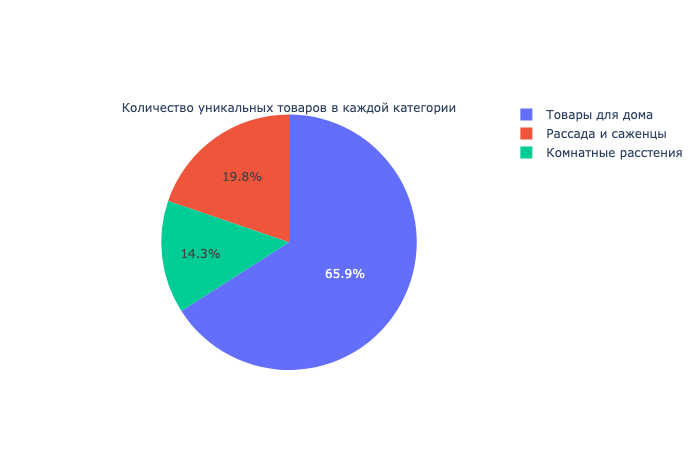

In [62]:
fig = go.Figure(data=[go.Pie(labels=freq['new_group'],
                             values=freq['unique_items'],
                            title='Количество уникальных товаров в каждой категории')])
fig.show('png')

---
Теперь посмотрю сколько пользователей находится в каждой группе товара.

In [63]:
customer_per_group = ecommerce_data.groupby('new_group', as_index=False).agg({'customer_id':'nunique'})
customer_per_group = customer_per_group.reset_index()
customer_per_group

,index,new_group,customer_id
0,0,Комнатные расстения,533
1,1,Рассада и саженцы,163
2,2,Товары для дома,1911


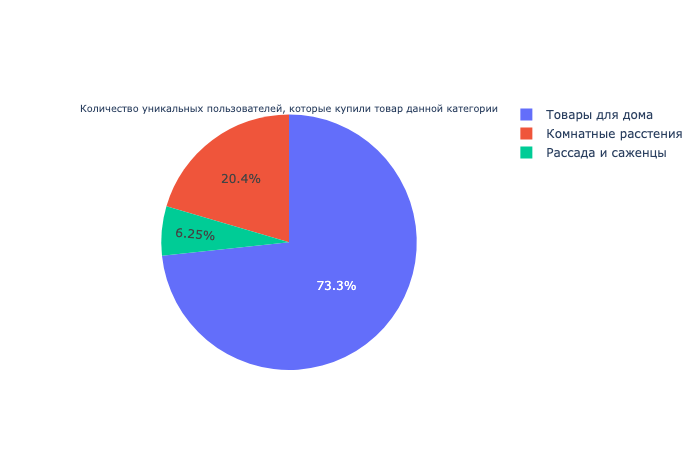

In [64]:
fig = go.Figure(data=[go.Pie(labels=customer_per_group['new_group'],
                            values=customer_per_group['customer_id'],
                            title='Количество уникальных пользователей, которые купили товар данной категории')])
fig.show('png')

Товары для дома имеют больший спрос.

In [65]:
revenue_per_group = ecommerce_data.groupby('new_group', as_index=False).agg({'order_value':'sum'})
revenue_per_group.rename(columns={'order_value':'revenue'}, inplace=True)
revenue_per_group.sort_values('revenue', ascending=False)

,new_group,revenue
2,Товары для дома,3655711.0
0,Комнатные расстения,311906.0
1,Рассада и саженцы,162994.0


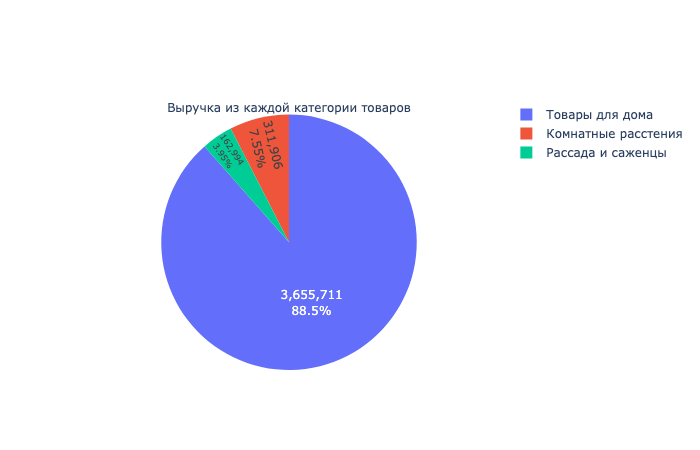

In [66]:
fig = go.Figure(data=[go.Pie(labels=revenue_per_group['new_group'],
                            values=revenue_per_group['revenue'],
                            title='Выручка из каждой категории товаров')])
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show('png')

Наибольшую выручку принесли магазину товары из группы "Товары для дома". "Рассада и саженцы" принесли меньше всего денег, что неудивительно, так как стоимость одной единицы рассады в среднем меньше стоимости одной единицы расстания или товара для дома.

___

In [67]:
prod_per_group = ecommerce_data.groupby(['new_group','customer_id'], as_index=False).agg({'order_id':'nunique'})

prod_per_group.sort_values('order_id', ascending=False).head()

,new_group,customer_id,order_id
2192,Товары для дома,c971fb21-d54c-4134-938f-16b62ee86d3b,104
1283,Товары для дома,4d93d3f6-8b24-403b-a74b-f5173e40d7db,33
412,Комнатные расстения,c971fb21-d54c-4134-938f-16b62ee86d3b,22
1548,Товары для дома,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,16
383,Комнатные расстения,b7b865ab-0735-407f-8d0c-31f74d2806cc,5


Пользователь c971fb21-d54c-4134-938f-16b62ee86d3b сделал больше всего заказов, при этом он сделал 104 заказа из "Товары для дома", а также 22 заказа из "Комнатные расстения". Этот пользователь уже встречался при анализе как пользователь с наибольшим количеством заказов. Я выдвинула гипотезу о том, что он является работником( владельцем или логистом) гостинечного бизнеса( отель, хостел и тд).

Покупатель *4d93d3f6-8b24-403b-a74b-f5173e40d7db*, занимающий 2 место по количеству заказов, уже встречался при анализе как владелец гостинечного бизнеса.

----

In [68]:
ecommerce_data['day_dt'] = ecommerce_data['date'].dt.date
ecommerce_data['hour'] = ecommerce_data['date'].dt.hour

In [69]:
ecommerce_data.head()

,date,customer_id,order_id,product,quantity,price,order_value,lemmatize,new_group,day_dt,hour
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,"[комнатный, , растение, , в, , горшок, , а...",Товары для дома,2018-10-01,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,"[комнатный, , растение, , в, , горшок, , к...",Товары для дома,2018-10-01,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,"[радермахер, , d, -, 12, , см, , h, -, 20, ...",Комнатные расстения,2018-10-01,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,"[хризолидокарпус, , лутесценс, , d, -, 9, ,...",Комнатные расстения,2018-10-01,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,"[циперус, , зумула, , d, -, 12, , см, , h,...",Комнатные расстения,2018-10-01,0


In [70]:
customer_per_day = ecommerce_data.groupby('day_dt', as_index=False).agg({'customer_id':'nunique'})

customer_per_day['day_dt'] = pd.to_datetime(customer_per_day['day_dt'])

In [71]:
customer_per_day

,day_dt,customer_id
0,2018-10-01,11
1,2018-10-02,11
2,2018-10-03,6
3,2018-10-04,10
4,2018-10-05,7
...,...,...
386,2019-10-27,3
387,2019-10-28,6
388,2019-10-29,2
389,2019-10-30,11


Разобью получившуюся таблицу на 4 периода по 3 месяца, для более удобного представления графиков и посмотрю в какие дни больше пользователей делали покупки.

In [72]:
customer_per_day_1 = customer_per_day[(customer_per_day['day_dt'] >= '2018-10-01')&\
                                      (customer_per_day['day_dt'] < '2019-01-01')]
customer_per_day_2 = customer_per_day[(customer_per_day['day_dt'] >= '2019-01-01')&\
                                      (customer_per_day['day_dt'] < '2019-04-01')]
customer_per_day_3 = customer_per_day[(customer_per_day['day_dt'] >= '2019-04-01')&\
                                      (customer_per_day['day_dt'] < '2019-07-01')]
customer_per_day_4 = customer_per_day[(customer_per_day['day_dt'] >= '2019-07-01')&\
                                      (customer_per_day['day_dt'] < '2019-10-13')]

In [73]:
def plot_per_3month(data):

    plt.figure(figsize=(12,10))
    plt.bar(data['day_dt'], data['customer_id'])
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', color='grey', which='major', alpha=.5)
    plt.show()

Период 2018-10-01 00:00:00 - 2018-12-29 00:00:00


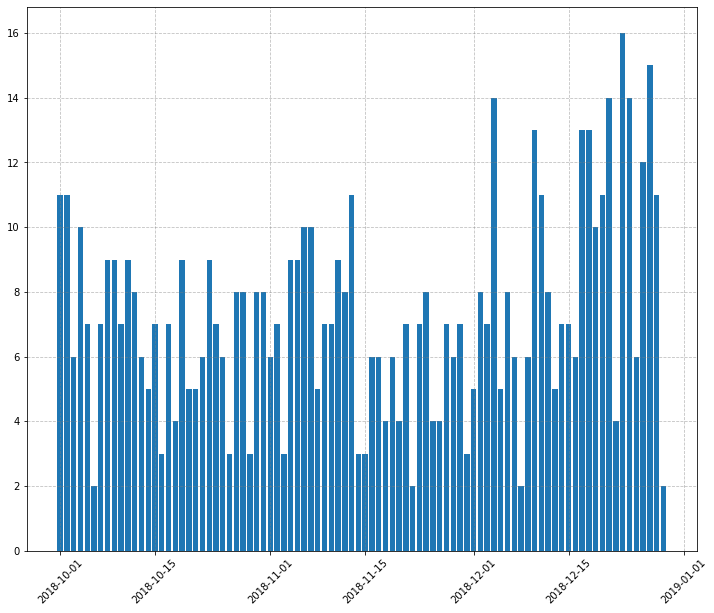

Период 2019-01-01 00:00:00 - 2019-03-31 00:00:00


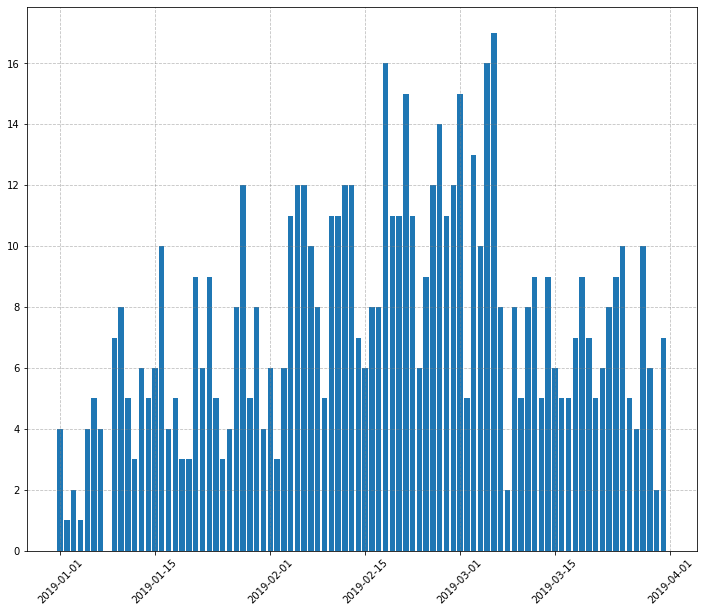

Период 2019-04-01 00:00:00 - 2019-06-30 00:00:00


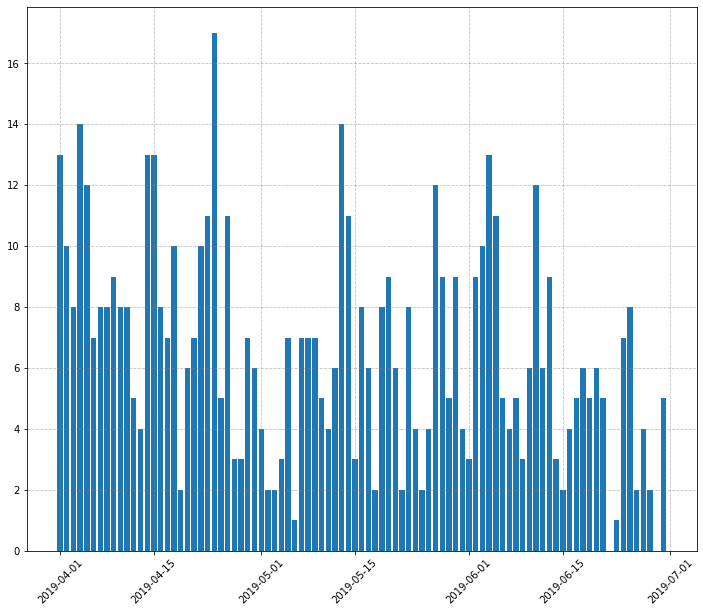

Период 2019-07-01 00:00:00 - 2019-10-12 00:00:00


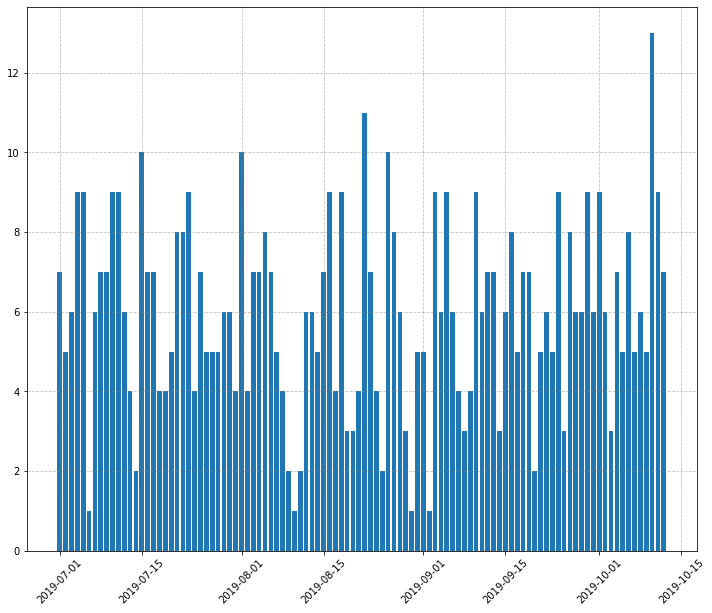

In [74]:
for data in [customer_per_day_1, customer_per_day_2, customer_per_day_3, customer_per_day_4]:
    print('Период {} - {}'.format(data['day_dt'].min(), data['day_dt'].max()))
    plot_per_3month(data)

В течении декабря наблюдаются пики по количеству покупок в день.В 2019 году  - с середины февраля по март, в конце апреля - начале мая. В период с июля по октябрь покупки реже, чем в прошлые периоды.

Такие скачки можно связать с праздниками, а также с сезоном посадки рассады (как я выяснила, часть покупателей являются садоводами)

In [75]:
def part(name):
    ecommerce_data_short = ecommerce_data[ecommerce_data['new_group'] == name]
    
    customer_per_day = ecommerce_data_short.groupby('day_dt').agg({'customer_id':'nunique'})
    customer_per_day = customer_per_day.reset_index()
    customer_per_day['day_dt'] = pd.to_datetime(customer_per_day['day_dt'])
    
    customer_per_day_1 = customer_per_day[(customer_per_day['day_dt'] >= '2018-10-01')&\
                                      (customer_per_day['day_dt'] < '2019-01-01')]
    customer_per_day_2 = customer_per_day[(customer_per_day['day_dt'] >= '2019-01-01')&\
                                      (customer_per_day['day_dt'] < '2019-04-01')]
    customer_per_day_3 = customer_per_day[(customer_per_day['day_dt'] >= '2019-04-01')&\
                                      (customer_per_day['day_dt'] < '2019-07-01')]
    customer_per_day_4 = customer_per_day[(customer_per_day['day_dt'] >= '2019-07-01')&\
                                      (customer_per_day['day_dt'] < '2019-10-13')]
        
    for data in [customer_per_day_1, customer_per_day_2, customer_per_day_3, customer_per_day_4]:
        display('Период {} - {}'.format(data['day_dt'].min(), data['day_dt'].max()))
        plot_per_3month(data)

'Товары для дома'

'Период 2018-10-01 00:00:00 - 2018-12-29 00:00:00'

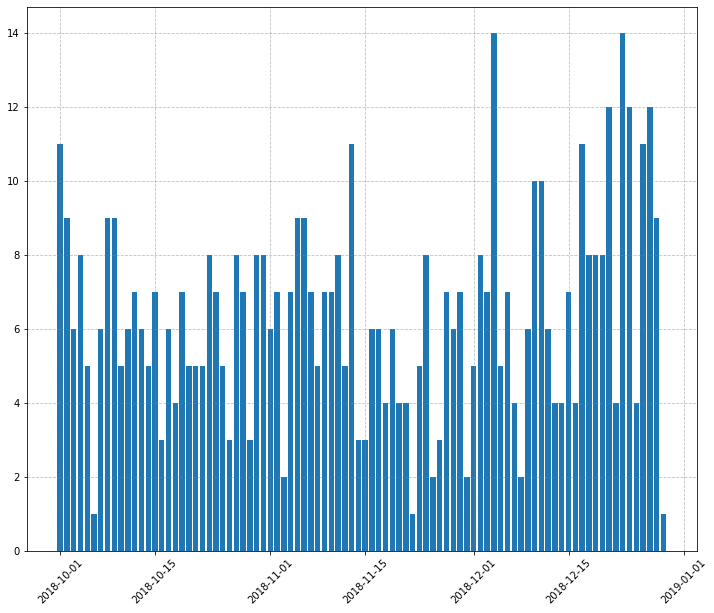

'Период 2019-01-01 00:00:00 - 2019-03-31 00:00:00'

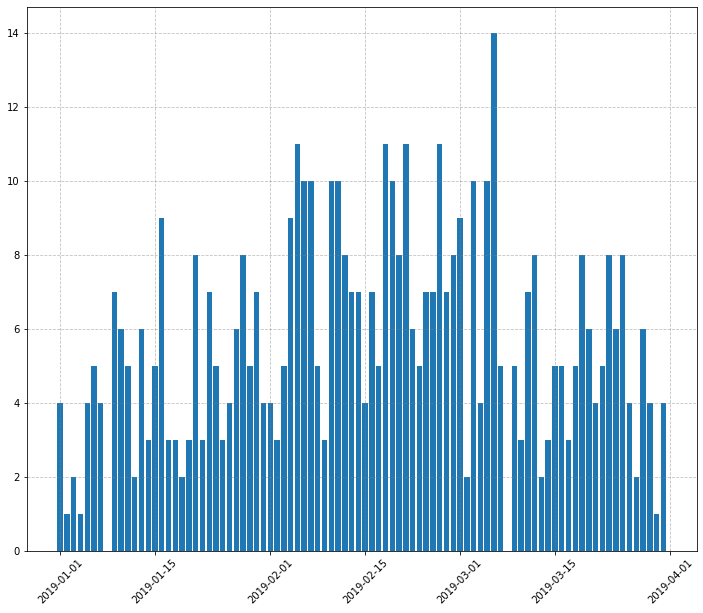

'Период 2019-04-01 00:00:00 - 2019-06-30 00:00:00'

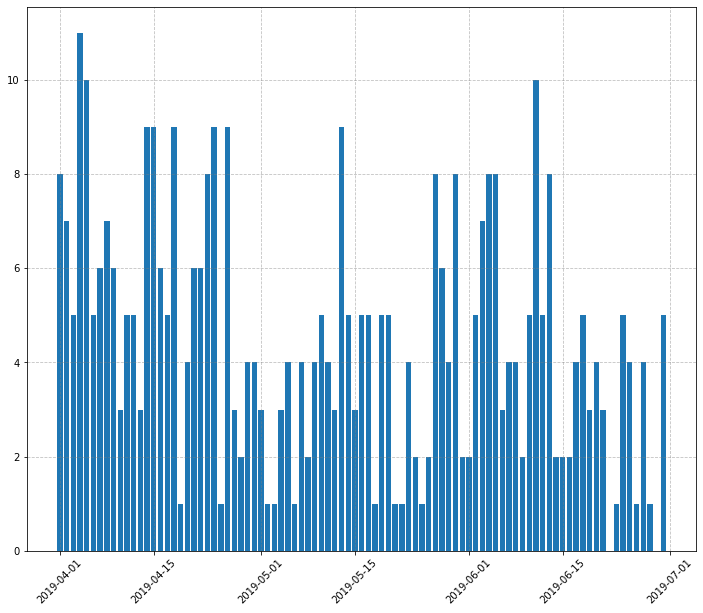

'Период 2019-07-01 00:00:00 - 2019-10-12 00:00:00'

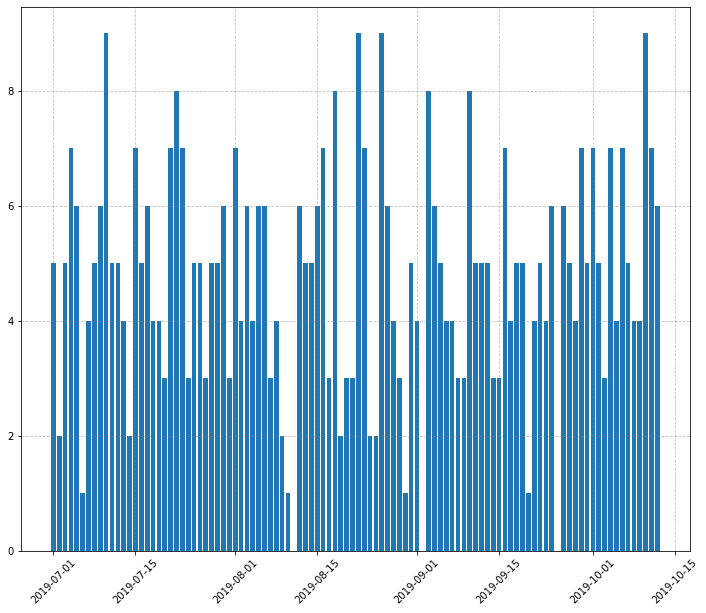

'Комнатные расстения'

'Период 2018-10-01 00:00:00 - 2018-12-29 00:00:00'

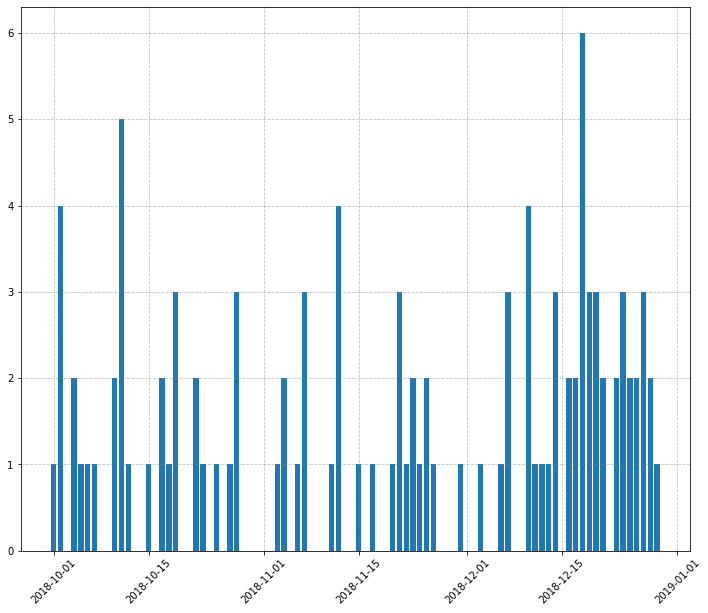

'Период 2019-01-10 00:00:00 - 2019-03-31 00:00:00'

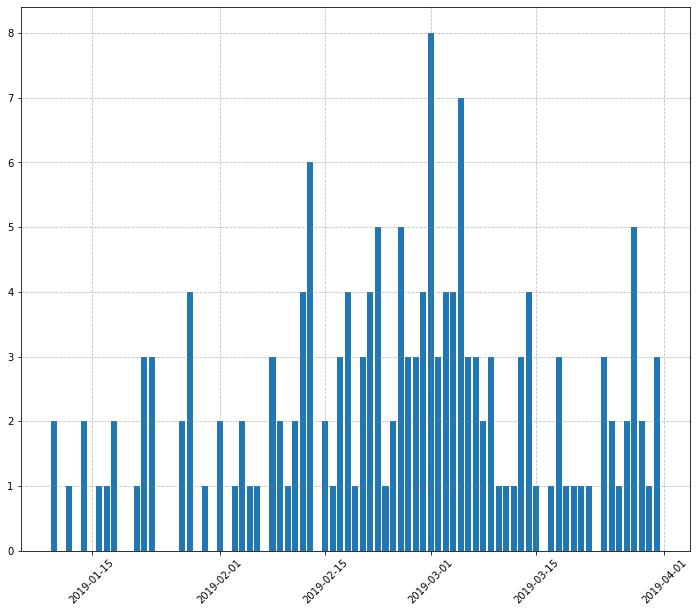

'Период 2019-04-01 00:00:00 - 2019-06-28 00:00:00'

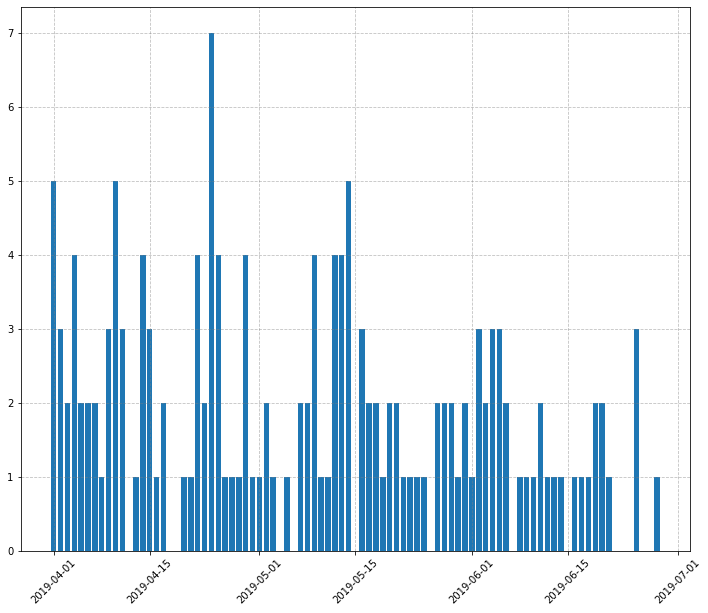

'Период 2019-07-01 00:00:00 - 2019-10-12 00:00:00'

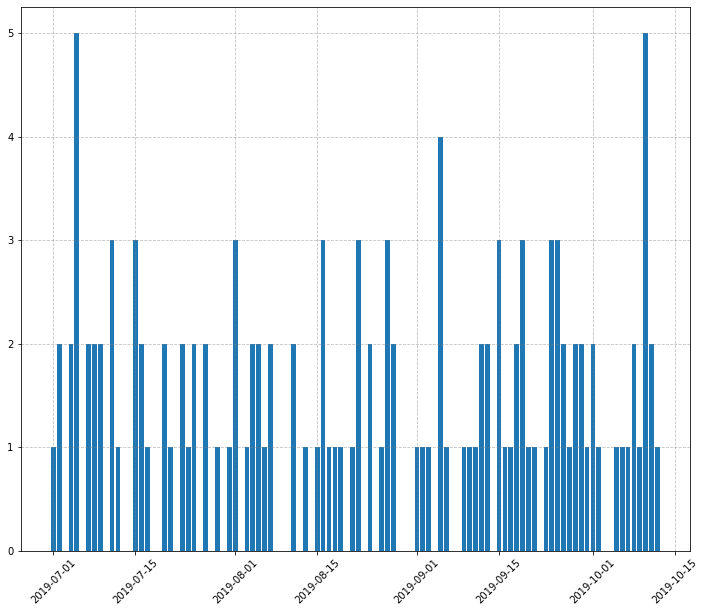

'Рассада и саженцы'

'Период 2018-10-02 00:00:00 - 2018-12-12 00:00:00'

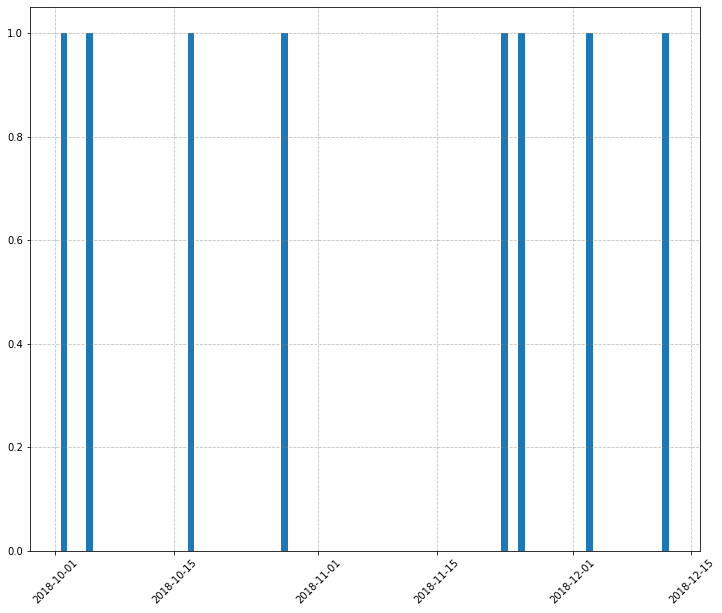

'Период 2019-01-15 00:00:00 - 2019-03-28 00:00:00'

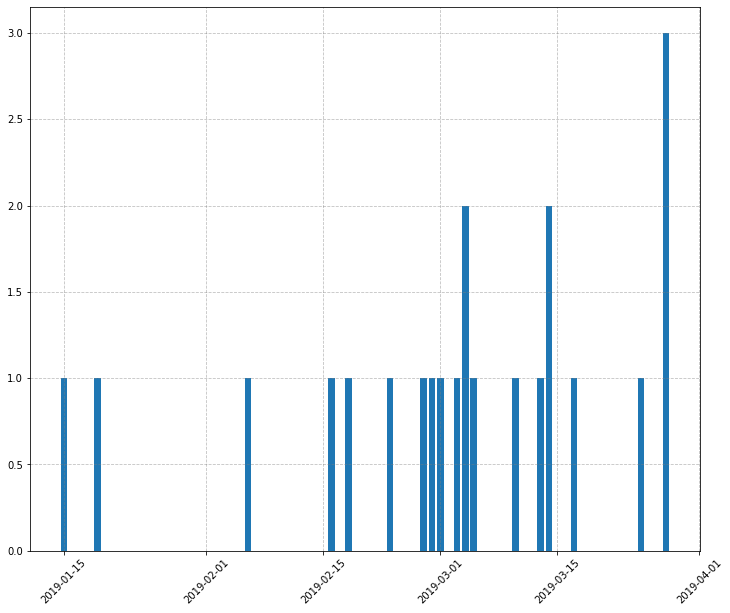

'Период 2019-04-02 00:00:00 - 2019-06-26 00:00:00'

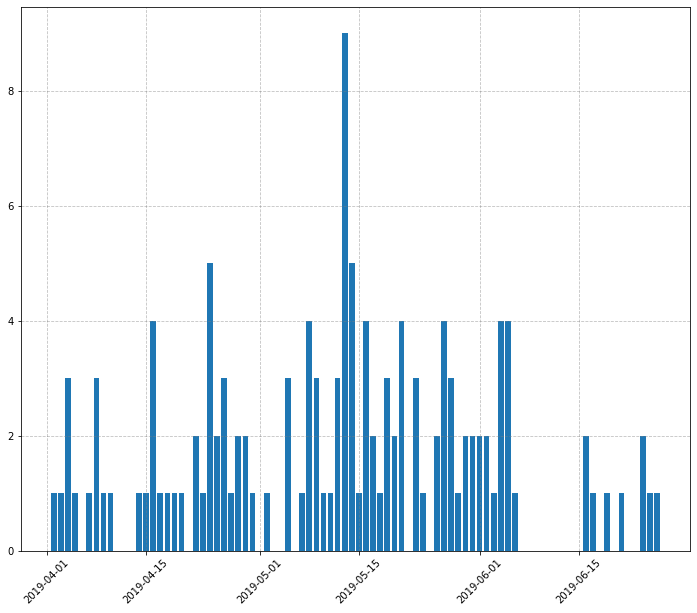

'Период 2019-07-01 00:00:00 - 2019-10-10 00:00:00'

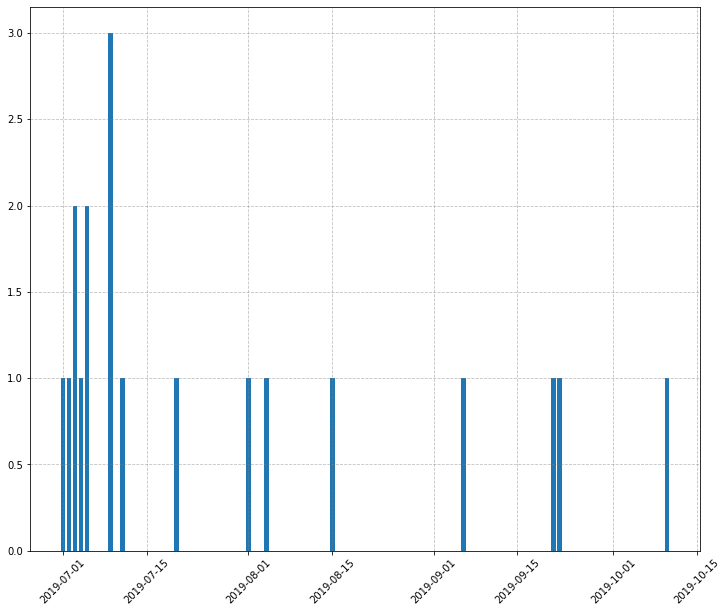

In [76]:
for name in ecommerce_data['new_group'].unique():
    display(name)
    part(name)

Заметно, что товары для дома чаще покупают под конец года, вполне возможно, если покупатель - работник гостинечного бизнеса, то прилив клиентов у них также будет к новому году,  и в период с середины февраля по март( в этот период попадают также праздники).

Рассаду редко покупают до нового года, но начиная с апреля активность покупки растет и так до середины лета. То есть сезон покупки рассады с апреля по август.

Комнатные расстения чаще покупают с февряля по март.

In [77]:
revenue_per_day = ecommerce_data.groupby('day_dt', as_index=False).agg({'order_value':'sum'})
revenue_per_day['day_dt'] = pd.to_datetime(revenue_per_day['day_dt'])
revenue_per_day.rename(columns={'order_value':'revenue'}, inplace=True)
revenue_per_day

,day_dt,revenue
0,2018-10-01,13934.0
1,2018-10-02,16746.0
2,2018-10-03,7275.0
3,2018-10-04,25170.0
4,2018-10-05,4720.0
...,...,...
386,2019-10-27,626.0
387,2019-10-28,6540.0
388,2019-10-29,642.0
389,2019-10-30,7809.0


In [78]:
revenue_per_day_1 = revenue_per_day[(revenue_per_day['day_dt'] >= '2018-10-01')&\
                                      (revenue_per_day['day_dt'] < '2019-01-01')]
revenue_per_day_2 = revenue_per_day[(revenue_per_day['day_dt'] >= '2019-01-01')&\
                                      (revenue_per_day['day_dt'] < '2019-04-01')]
revenue_per_day_3 = revenue_per_day[(revenue_per_day['day_dt'] >= '2019-04-01')&\
                                      (revenue_per_day['day_dt'] < '2019-07-01')]
revenue_per_day_4 = revenue_per_day[(revenue_per_day['day_dt'] >= '2019-07-01')&\
                                      (revenue_per_day['day_dt'] < '2019-10-13')]

In [79]:
def plot_per_3month_rev(data):

        plt.figure(figsize=(12,10))
        plt.bar(data['day_dt'], data['revenue'])
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', color='grey', which='major', alpha=.5)
        plt.show()

Период 2018-10-01 00:00:00 - 2018-12-29 00:00:00


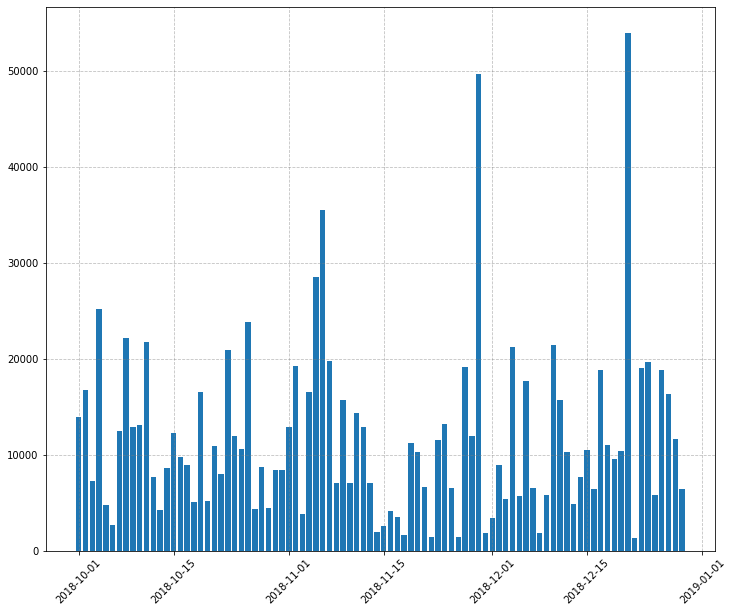

Период 2019-01-01 00:00:00 - 2019-03-31 00:00:00


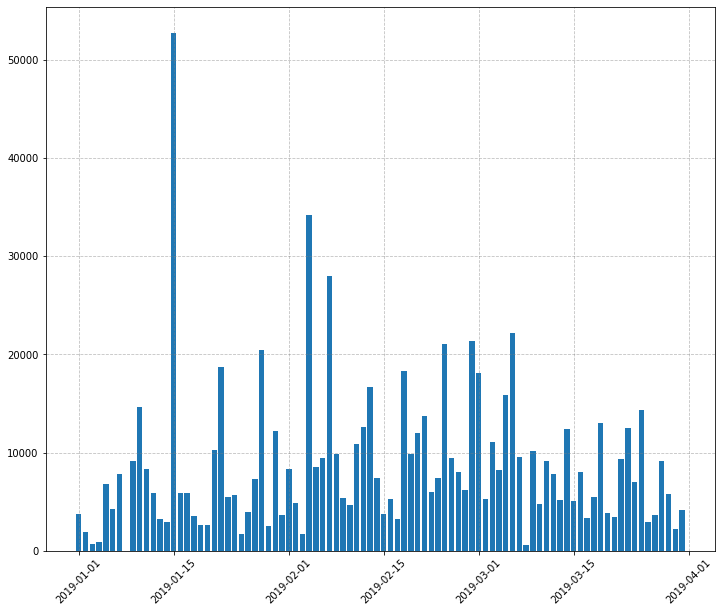

Период 2019-04-01 00:00:00 - 2019-06-30 00:00:00


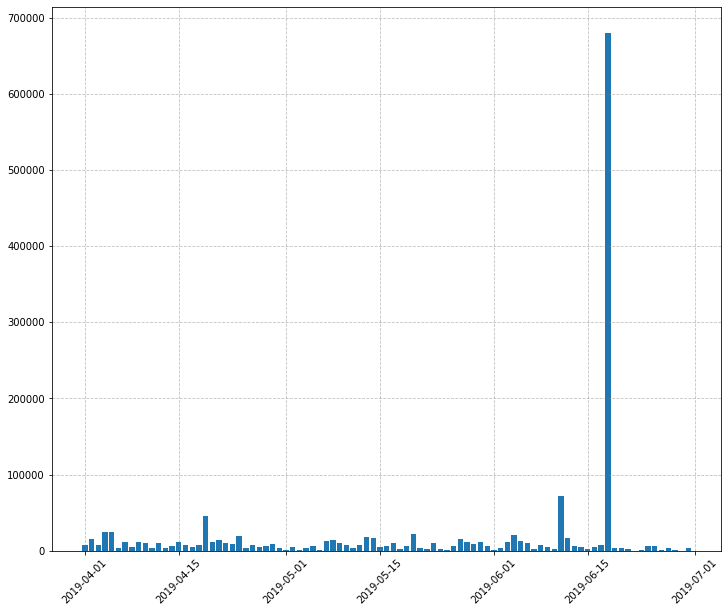

Период 2019-07-01 00:00:00 - 2019-10-12 00:00:00


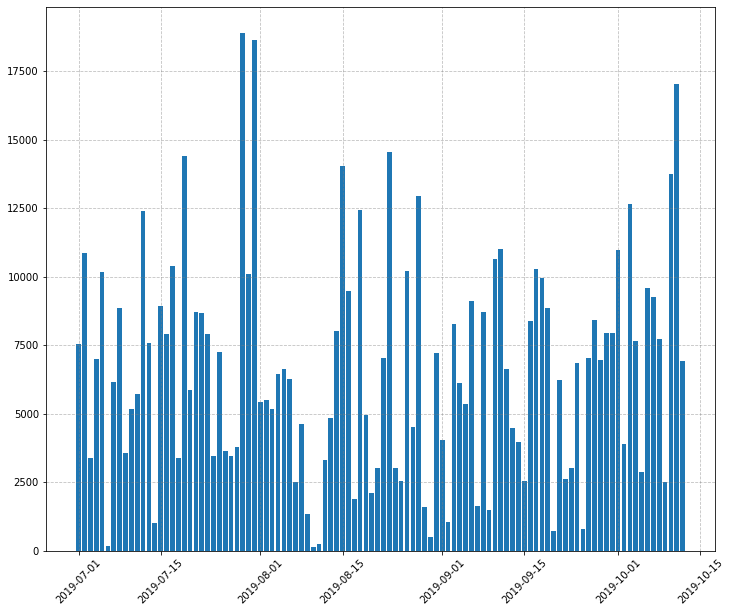

In [80]:
for data in [revenue_per_day_1, revenue_per_day_2, revenue_per_day_3, revenue_per_day_4]:
    print('Период {} - {}'.format(data['day_dt'].min(), data['day_dt'].max()))
    plot_per_3month_rev(data)

В середине июня сумма покупок была самая высокая - 70000 р. Также в конце декабря и в середине января сумма покупок за дни была чут выше 50000р

In [81]:
def part_revenue(name):
    ecommerce_data_short = ecommerce_data[ecommerce_data['new_group'] == name]
    
    revenue_per_day = ecommerce_data_short.groupby('day_dt', as_index=False).agg({'order_value':'sum'})
    revenue_per_day['day_dt'] = pd.to_datetime(revenue_per_day['day_dt'])
    revenue_per_day.rename(columns={'order_value':'revenue'}, inplace=True)
    
    revenue_per_day_1 = revenue_per_day[(revenue_per_day['day_dt'] >= '2018-10-01')&\
                                      (revenue_per_day['day_dt'] < '2019-01-01')]
    revenue_per_day_2 = revenue_per_day[(revenue_per_day['day_dt'] >= '2019-01-01')&\
                                      (revenue_per_day['day_dt'] < '2019-04-01')]
    revenue_per_day_3 = revenue_per_day[(revenue_per_day['day_dt'] >= '2019-04-01')&\
                                      (revenue_per_day['day_dt'] < '2019-07-01')]
    revenue_per_day_4 = revenue_per_day[(revenue_per_day['day_dt'] >= '2019-07-01')&\
                                      (revenue_per_day['day_dt'] < '2019-10-13')]
        
    for data in [revenue_per_day_1, revenue_per_day_2, revenue_per_day_3, revenue_per_day_4]:
        print('Период {} - {}'.format(data['day_dt'].min(), data['day_dt'].max()))
        plot_per_3month_rev(data)

'Товары для дома'

Период 2018-10-01 00:00:00 - 2018-12-29 00:00:00


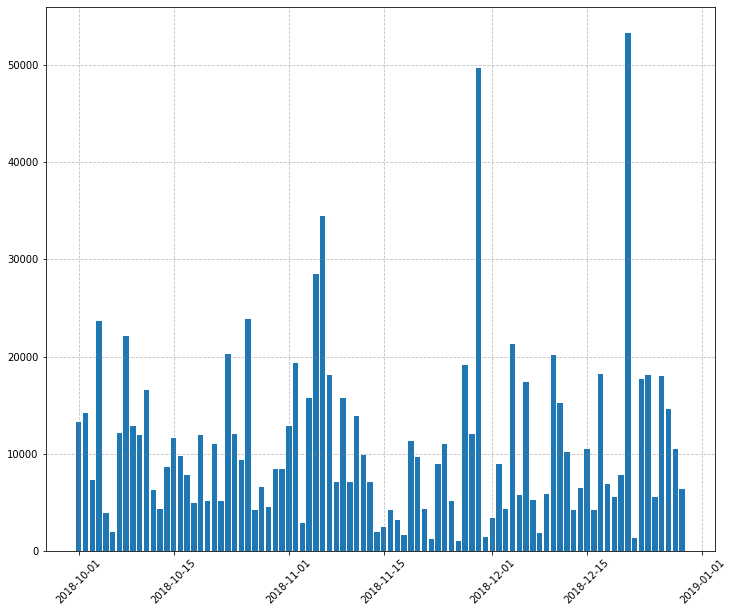

Период 2019-01-01 00:00:00 - 2019-03-31 00:00:00


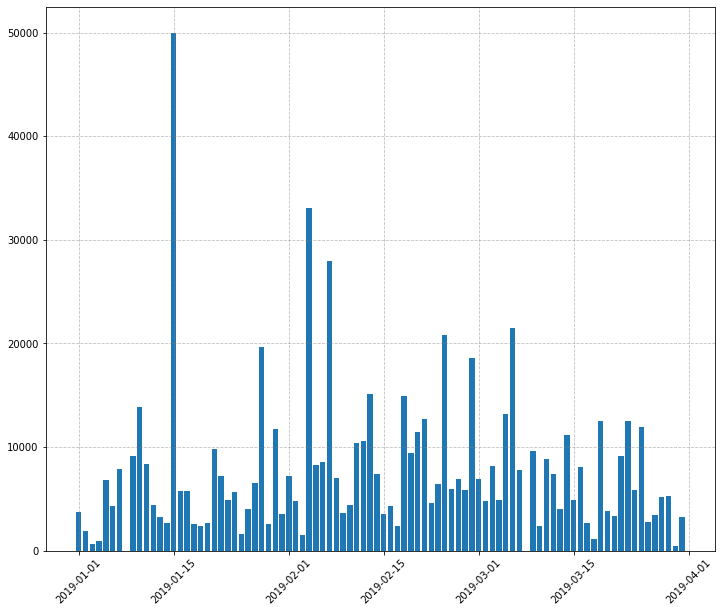

Период 2019-04-01 00:00:00 - 2019-06-30 00:00:00


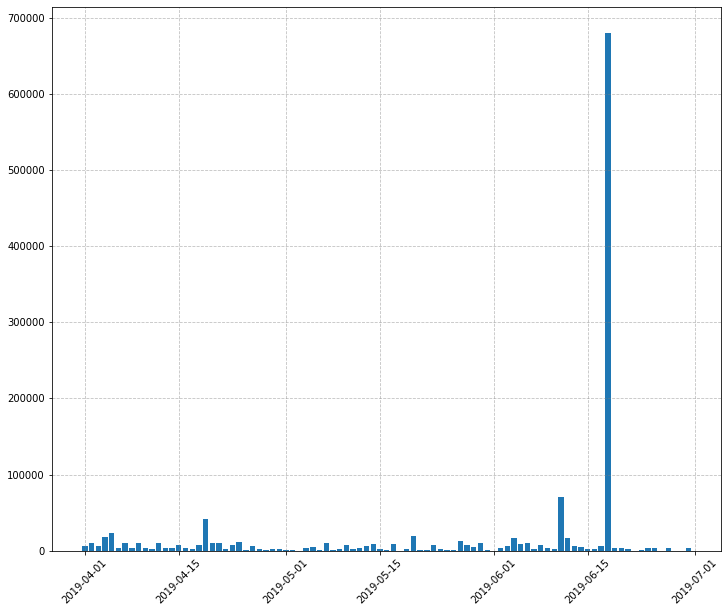

Период 2019-07-01 00:00:00 - 2019-10-12 00:00:00


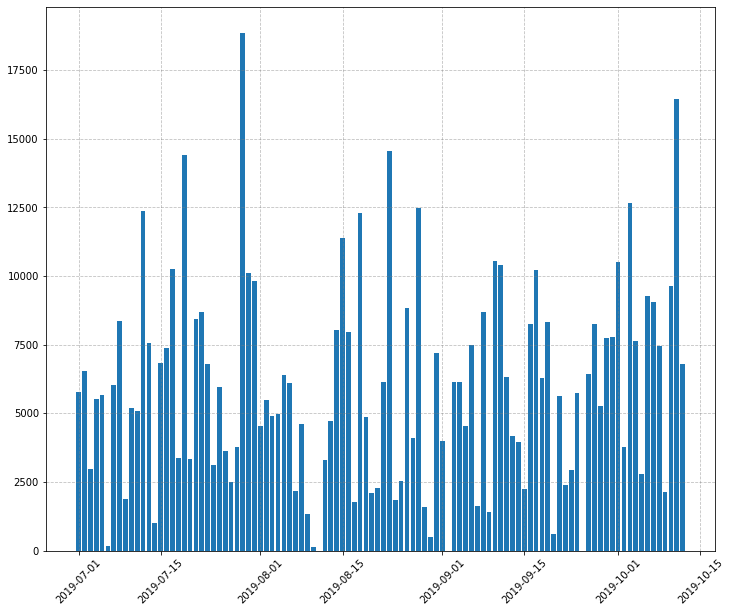

'Комнатные расстения'

Период 2018-10-01 00:00:00 - 2018-12-29 00:00:00


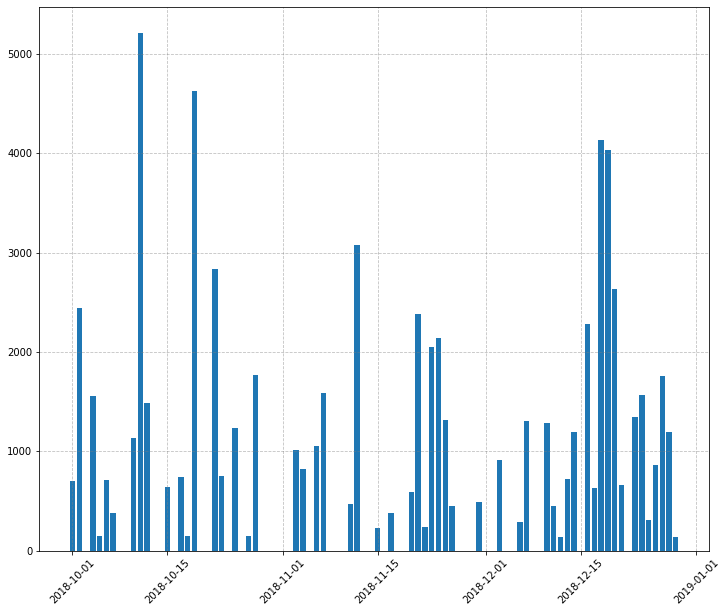

Период 2019-01-10 00:00:00 - 2019-03-31 00:00:00


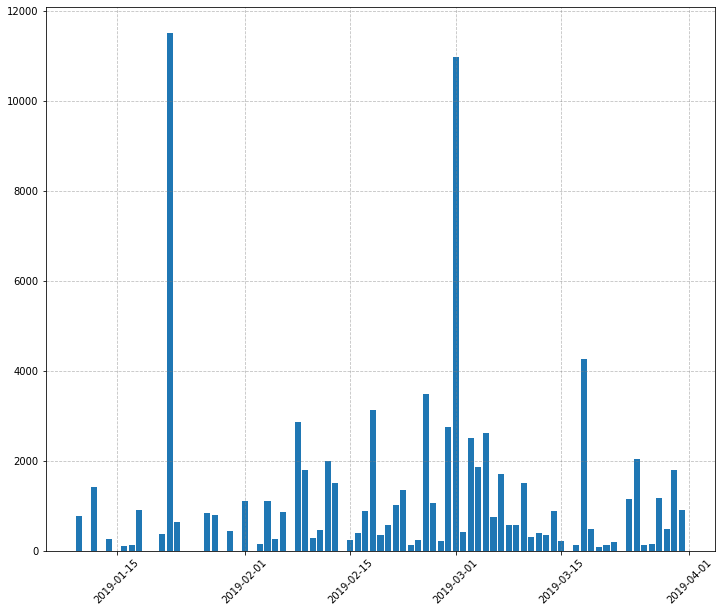

Период 2019-04-01 00:00:00 - 2019-06-28 00:00:00


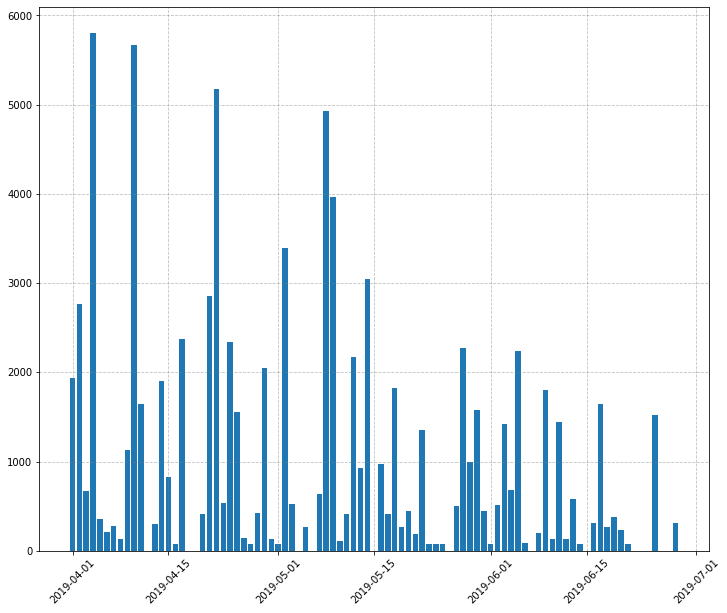

Период 2019-07-01 00:00:00 - 2019-10-12 00:00:00


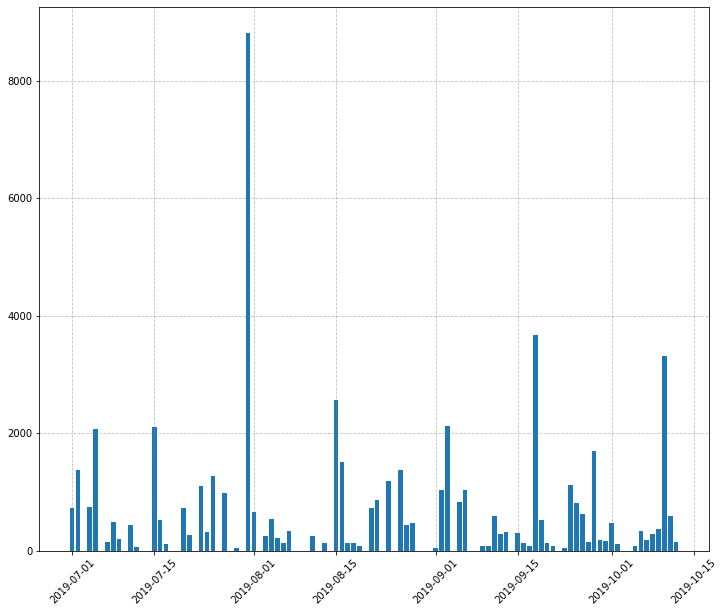

'Рассада и саженцы'

Период 2018-10-02 00:00:00 - 2018-12-12 00:00:00


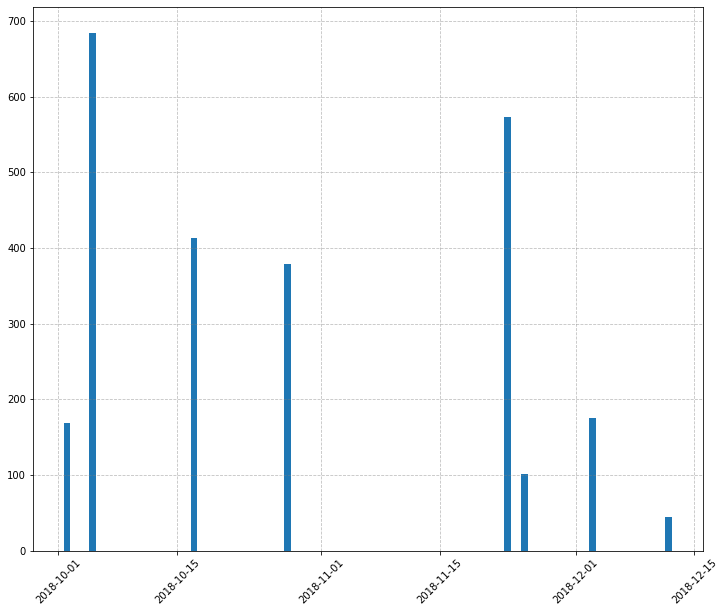

Период 2019-01-15 00:00:00 - 2019-03-28 00:00:00


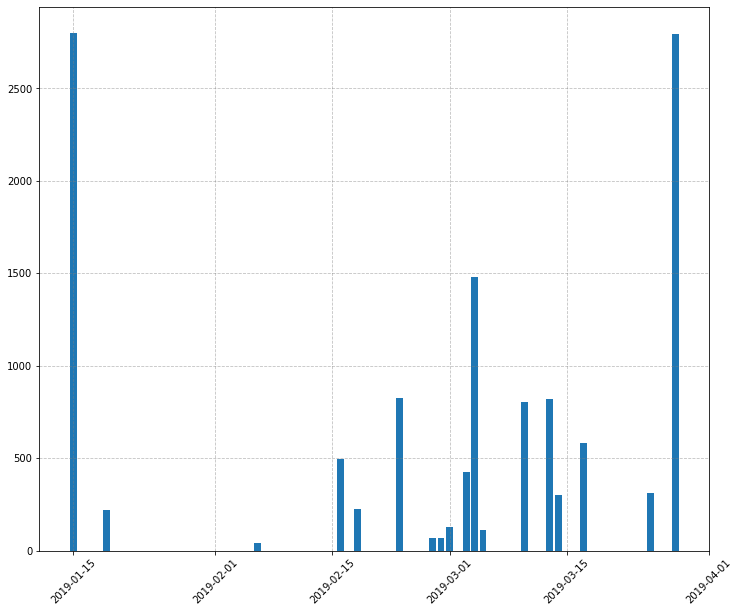

Период 2019-04-02 00:00:00 - 2019-06-26 00:00:00


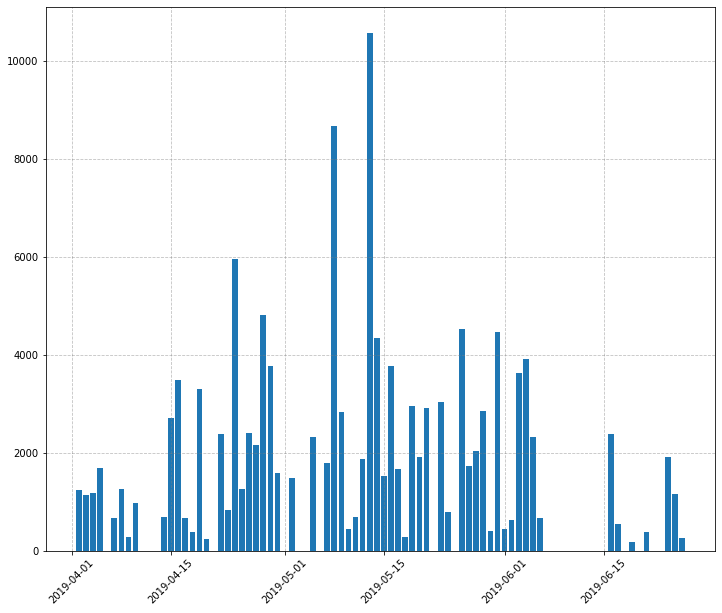

Период 2019-07-01 00:00:00 - 2019-10-10 00:00:00


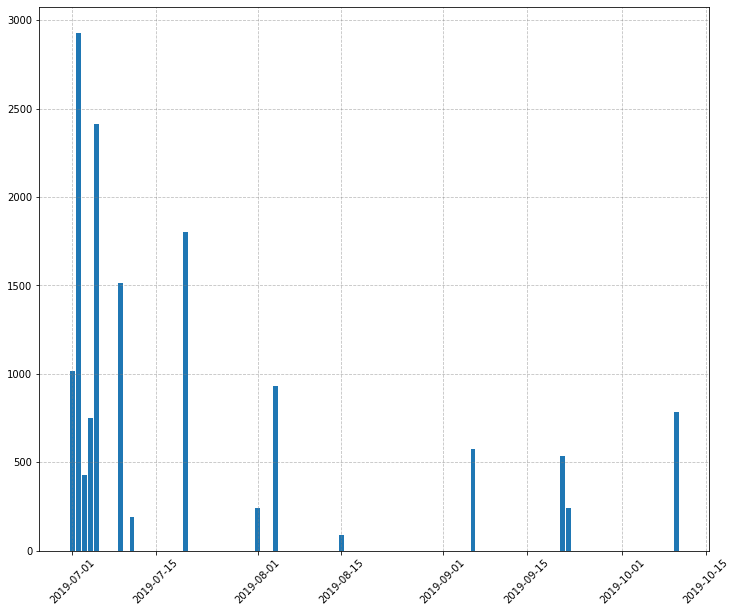

In [82]:
for name in ecommerce_data['new_group'].unique():
    display(name)
    part_revenue(name)

Тот пик в июне относился к товарам из категории "Товары для дома".


Сумма покупок для группы рассады больше всего была в мае, в 15-ых числах, более 10000р.

Комнатные расстения принесли больше всего денег для магазина в середине января, в марте.

**Когортный анализ**

In [83]:
ecommerce_data_first = ecommerce_data.groupby('customer_id', as_index=False).agg({'date':'min'})

In [84]:
ecommerce_data_first.rename(columns={"date":'first_purchase_datetime'}, inplace=True)
ecommerce_data_first

,customer_id,first_purchase_datetime
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00
...,...,...
2446,ff601403-b094-4b86-9ac6-264d725b9277,2019-08-16 16:00:00
2447,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2019-10-30 07:00:00
2448,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,2018-12-14 23:00:00
2449,ffb80538-3fda-4351-8ea9-9d2bec58bb07,2019-09-09 12:00:00


In [85]:
ecommerce_data = ecommerce_data.merge(ecommerce_data_first, on = 'customer_id')

In [86]:
ecommerce_data['purchase_month'] = ecommerce_data['date'].astype('datetime64[M]')
ecommerce_data['first_purchase_month'] = ecommerce_data['first_purchase_datetime'].astype('datetime64[M]')

In [87]:
cohort_stats = ecommerce_data.groupby('first_purchase_month').agg({'order_value':'sum'})

In [88]:
cohort_stats

,order_value
first_purchase_month,
2018-10-01,483820.0
2018-11-01,334561.0
2018-12-01,314983.0
2019-01-01,228906.0
2019-02-01,262643.0
2019-03-01,253692.0
2019-04-01,320626.0
2019-05-01,226937.0
2019-06-01,901363.0


In [89]:
ecommerce_data.pivot_table(index='first_purchase_month',
                          columns='purchase_month',
                          values='customer_id',
                          aggfunc='nunique').fillna('')

purchase_month,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01
first_purchase_month,,,,,,,,,,,,,
2018-10-01,181,1,1,3,1,1,,,,,,,
2018-11-01,,177,,,,1,,,,,,,
2018-12-01,,,237,1,,,,,,,,,
2019-01-01,,,,148,3,,1,,,,,,
2019-02-01,,,,,243,4,3,,,,,,
2019-03-01,,,,,,230,7,1,1,,,,
2019-04-01,,,,,,,228,5,,1,,,
2019-05-01,,,,,,,,166,2,,2,,1
2019-06-01,,,,,,,,,152,2,,,


Из таблицы можно сделать сразу несколько выводов:
* После первого месяца количество покупателей в когорте снижается
* Очень мало пользователей возвращаются за повторной покупкой в целом
* В февральской когорте пришло больше всего покупателей на сайт

In [90]:
ecommerce_data['cohort_lifetime'] = (ecommerce_data['purchase_month'] - ecommerce_data['first_purchase_month']) \
/ np.timedelta64(1, 'M')
ecommerce_data['cohort_lifetime'] = ecommerce_data['cohort_lifetime'].round()
ecommerce_data['cohort_lifetime'] = ecommerce_data['cohort_lifetime'].astype('int')
ecommerce_data['first_purchase_month'] = ecommerce_data['first_purchase_month'].dt.strftime('%Y-%m')

Посмотрю на изменение среднего чека заказа

In [91]:
lifetime_pivot = ecommerce_data.pivot_table(index='first_purchase_month',
                          columns='cohort_lifetime',
                          values='order_value',
                          aggfunc='mean')
lifetime_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5
first_purchase_month,,,,,,
2018-10,727.086777,780.656,1023.09,1181.12,1600.21,1085.12
2018-11,844.361111,,,,194,
2018-12,1140.594891,2460,,,,
2019-01,1270.017045,585.625,,139.6,,
2019-02,792.960123,83.5,253.6,,,
2019-03,607.910448,209.97,1124,135,,
2019-04,491.570513,485.077,,1274,,
2019-05,315.998584,191.938,,207.333,,149
2019-06,3237.424460,194.143,,,,


<AxesSubplot:xlabel='cohort_lifetime', ylabel='first_purchase_month'>

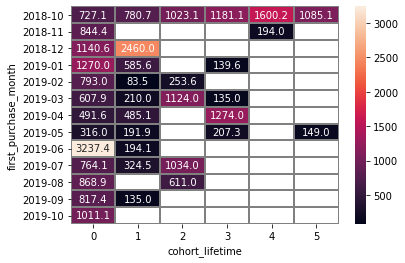

In [92]:
sns.heatmap(lifetime_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

Время жизни когорты не больше 5 месяцев. В первой когорте срдедний чек от заказа растет в течении 4 месяцев. 

Вторая когорта:
* Время жизни всего два месяца
* Средний чек вырос в 2 раза с первого месяца


Самый выскоий  средний чек заказа был в июньской когорте.

При том, что в февральской когорте пришло больше всего покупателей, средний чек не самый высокий.

Посмотрю на распредление уникальных заказов в категориях товаров в тех когортах, где высокий средний чек.

In [93]:
for date in lifetime_pivot.index:
    print('Когорта {}'.format(date))
    display(ecommerce_data[ecommerce_data['first_purchase_month'] == date].pivot_table(index='new_group',
                                                                               columns='cohort_lifetime',
                                                                               values='order_id',
                                                                               aggfunc='nunique').fillna(''))
    print('')

Когорта 2018-10


cohort_lifetime,0,1,2,3,4,5
new_group,,,,,,
Комнатные расстения,33.0,2,10,1,4,5
Рассада и саженцы,4.0,,,,,
Товары для дома,215.0,18,33,7,24,3



Когорта 2018-11


cohort_lifetime,0,4
new_group,,
Комнатные расстения,25.0,
Рассада и саженцы,2.0,
Товары для дома,163.0,1



Когорта 2018-12


cohort_lifetime,0,1
new_group,,
Комнатные расстения,40.0,
Рассада и саженцы,2.0,
Товары для дома,201.0,1



Когорта 2019-01


cohort_lifetime,0,1,3
new_group,,,
Комнатные расстения,22.0,1,1
Рассада и саженцы,2.0,,
Товары для дома,135.0,2,



Когорта 2019-02


cohort_lifetime,0,1,2
new_group,,,
Комнатные расстения,62.0,1,3.0
Рассада и саженцы,6.0,,3.0
Товары для дома,191.0,3,1.0



Когорта 2019-03


cohort_lifetime,0,1,2,3
new_group,,,,
Комнатные расстения,71.0,6.0,,1
Рассада и саженцы,14.0,2.0,2,
Товары для дома,162.0,3.0,,



Когорта 2019-04


cohort_lifetime,0,1,3
new_group,,,
Комнатные расстения,62.0,1.0,
Рассада и саженцы,38.0,2.0,
Товары для дома,180.0,4.0,1



Когорта 2019-05


cohort_lifetime,0,1,3,5
new_group,,,,
Комнатные расстения,51.0,2.0,1,1
Рассада и саженцы,63.0,2.0,,
Товары для дома,109.0,1.0,1,



Когорта 2019-06


cohort_lifetime,0,1
new_group,,
Комнатные расстения,31.0,2
Рассада и саженцы,22.0,
Товары для дома,116.0,



Когорта 2019-07


cohort_lifetime,0,1,2
new_group,,,
Комнатные расстения,38.0,2,2
Рассада и саженцы,12.0,,
Товары для дома,156.0,,



Когорта 2019-08


cohort_lifetime,0,2
new_group,,
Комнатные расстения,30.0,1
Рассада и саженцы,3.0,
Товары для дома,142.0,1



Когорта 2019-09


cohort_lifetime,0,1
new_group,,
Комнатные расстения,42.0,1
Рассада и саженцы,3.0,
Товары для дома,137.0,



Когорта 2019-10


cohort_lifetime,0
new_group,
Комнатные расстения,50
Рассада и саженцы,2
Товары для дома,145


В категории "Товары для дома" прослеживается немного сезонность (январь, февраль, апрель)

Также сезонность в категории рассада и саженцы(в прошлом пункте я описала это )

<a id='RFM'></a>
**RFM-таблица**

In [94]:
ecommerce_data

,date,customer_id,order_id,product,quantity,price,order_value,lemmatize,new_group,day_dt,hour,first_purchase_datetime,purchase_month,first_purchase_month,cohort_lifetime
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,"[комнатный, , растение, , в, , горшок, , а...",Товары для дома,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,"[комнатный, , растение, , в, , горшок, , к...",Товары для дома,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,"[радермахер, , d, -, 12, , см, , h, -, 20, ...",Комнатные расстения,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,"[хризолидокарпус, , лутесценс, , d, -, 9, ,...",Комнатные расстения,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,"[циперус, , зумула, , d, -, 12, , см, , h,...",Комнатные расстения,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,2019-10-30 21:00:00,b24b3075-bbb5-498c-add9-534a727f3c33,73151,Герань домашняя (пеларгония зональная) цветуща...,2,157.0,314.0,"[герань, , домашний, (, пеларгония, , зонал...",Комнатные расстения,2019-10-30,21,2019-10-30 21:00:00,2019-10-01,2019-10,0
4847,2019-10-31 09:00:00,6ddd4081-515e-401a-9567-8c0eab6dc868,73154,Литопс Микс d-5 см,1,112.0,112.0,"[литопс, , микс, , d, -, 5, , см, \n]",Комнатные расстения,2019-10-31,9,2019-10-31 09:00:00,2019-10-01,2019-10,0
4848,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,329.0,"[мимоза, , стыдливый, , d, -, 9, , см, \n]",Комнатные расстения,2019-10-31,11,2019-10-31 11:00:00,2019-10-01,2019-10,0
4849,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,"[сумка, -, тележка, , 2, -, х, , колесный, ...",Товары для дома,2019-10-31,12,2019-10-31 12:00:00,2019-10-01,2019-10,0


In [95]:
max_date = ecommerce_data.groupby('customer_id').agg({'date':'max'})

max_date.rename(columns={'date':'max_date'}, inplace=True)

In [96]:
ecommerce_data = ecommerce_data.merge(max_date, on='customer_id')
ecommerce_data

,date,customer_id,order_id,product,quantity,price,order_value,lemmatize,new_group,day_dt,hour,first_purchase_datetime,purchase_month,first_purchase_month,cohort_lifetime,max_date
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,"[комнатный, , растение, , в, , горшок, , а...",Товары для дома,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0,2018-10-01 00:00:00
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,"[комнатный, , растение, , в, , горшок, , к...",Товары для дома,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0,2018-10-01 00:00:00
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,"[радермахер, , d, -, 12, , см, , h, -, 20, ...",Комнатные расстения,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0,2018-10-01 00:00:00
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,"[хризолидокарпус, , лутесценс, , d, -, 9, ,...",Комнатные расстения,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0,2018-10-01 00:00:00
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,"[циперус, , зумула, , d, -, 12, , см, , h,...",Комнатные расстения,2018-10-01,0,2018-10-01 00:00:00,2018-10-01,2018-10,0,2018-10-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,2019-10-30 21:00:00,b24b3075-bbb5-498c-add9-534a727f3c33,73151,Герань домашняя (пеларгония зональная) цветуща...,2,157.0,314.0,"[герань, , домашний, (, пеларгония, , зонал...",Комнатные расстения,2019-10-30,21,2019-10-30 21:00:00,2019-10-01,2019-10,0,2019-10-30 21:00:00
4847,2019-10-31 09:00:00,6ddd4081-515e-401a-9567-8c0eab6dc868,73154,Литопс Микс d-5 см,1,112.0,112.0,"[литопс, , микс, , d, -, 5, , см, \n]",Комнатные расстения,2019-10-31,9,2019-10-31 09:00:00,2019-10-01,2019-10,0,2019-10-31 09:00:00
4848,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,329.0,"[мимоза, , стыдливый, , d, -, 9, , см, \n]",Комнатные расстения,2019-10-31,11,2019-10-31 11:00:00,2019-10-01,2019-10,0,2019-10-31 11:00:00
4849,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,"[сумка, -, тележка, , 2, -, х, , колесный, ...",Товары для дома,2019-10-31,12,2019-10-31 12:00:00,2019-10-01,2019-10,0,2019-10-31 12:00:00


Чтобы посчитать recency, я возьму максимально последний день за наш период и прибавлю 1 день, чтобы в таблице не было нулей.

In [97]:
snapshot_date =  ecommerce_data['date'].max() + pd.Timedelta('1 days')
snapshot_date

Timestamp('2019-11-01 14:00:00')

In [98]:
ecommerce_data['date_interval'] = (ecommerce_data['max_date'] - ecommerce_data['date']) / np.timedelta64(1, 'D')
ecommerce_data['date_interval'] = round(ecommerce_data['date_interval'])
ecommerce_data['date_interval'] = ecommerce_data['date_interval'].astype('int')

In [99]:
rfm_data = ecommerce_data.groupby(['customer_id'], as_index=False).\
agg({'date': lambda x:(snapshot_date - x.max()).days,
     'order_id':'count', 'order_value':'mean'})
rfm_data.rename(columns={'date':'recency', 'order_id':'frequency', 'order_value':'monetary'}, inplace=True)

In [100]:
rfm_data

,customer_id,recency,frequency,monetary
0,000d6849-084e-4d9f-ac03-37174eaf60c4,16,4,138.75
1,001cee7f-0b29-4716-b202-0042213ab038,258,1,442.00
2,00299f34-5385-4d13-9aea-c80b81658e1b,17,1,914.00
3,002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,2324.00
...,...,...,...,...
2446,ff601403-b094-4b86-9ac6-264d725b9277,76,1,1649.00
2447,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2,1,397.00
2448,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,321,1,389.00
2449,ffb80538-3fda-4351-8ea9-9d2bec58bb07,53,1,974.00


In [101]:
warnings.filterwarnings('ignore')

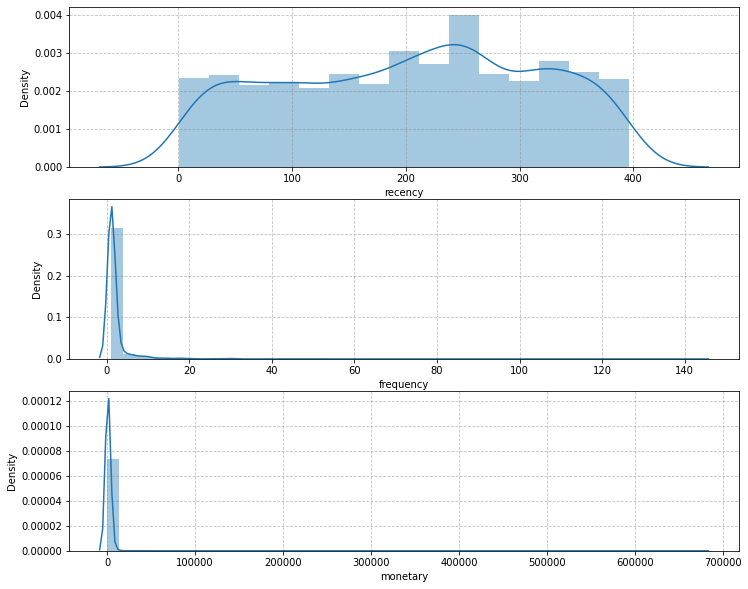

In [102]:
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1)
sns.distplot(rfm_data['recency'])
plt.grid(True, linestyle='--', color='grey', which='major', alpha=.5)

plt.subplot(3, 1, 2)
sns.distplot(rfm_data['frequency'])
plt.grid(True, linestyle='--', color='grey', which='major', alpha=.5)

plt.subplot(3, 1, 3)
sns.distplot(rfm_data['monetary'])
plt.grid(True, linestyle='--', color='grey', which='major', alpha=.5)

plt.show()


Гистограмма recency распределена довольно равномерно, есть один небольшой пик.

А вот у frequency и monetary показатели смещены к меньшим. Посмотрю на квантили.

In [103]:
r_label=range(4, 0, -1)
f_label = range(1,5)
m_labels = range(1, 5)

In [104]:
r_groups = pd.qcut(rfm_data['recency'], q=[0, .25, .5, .75, 1.], labels=r_label)


In [105]:
r_groups

0       4
1       2
2       4
3       2
4       4
       ..
2446    4
2447    4
2448    1
2449    4
2450    4
Name: recency, Length: 2451, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [106]:
f_group = pd.qcut(rfm_data['frequency'], q=[.3, .85, .95, .99, 1.], labels=f_label)

In [107]:
f_group

0       2
1       1
2       1
3       1
4       1
       ..
2446    1
2447    1
2448    1
2449    1
2450    1
Name: frequency, Length: 2451, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [108]:
m_groups = pd.qcut(rfm_data['monetary'], q=4, labels=m_labels)
m_groups

0       1
1       2
2       3
3       4
4       4
       ..
2446    4
2447    2
2448    2
2449    3
2450    3
Name: monetary, Length: 2451, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [109]:
rfm_data =rfm_data.assign(r=r_groups.values, f=f_group.values, m = m_groups.values)
rfm_data.sort_values('f')

,customer_id,recency,frequency,monetary,r,f,m
1225,811a5038-1b6a-433a-995c-d5a9a5a82393,47,1,487.000000,4,1,2
1596,aaafc0ca-1fd4-4d0b-b7b8-37391c319fd3,213,1,3776.000000,2,1,4
1595,aa7151ae-8da0-41ca-85b6-5c1b331d5bdc,140,1,74.000000,3,1,1
1594,aa42dc38-780f-4b50-9a65-83b6fa64e766,365,1,8670.000000,1,1,4
1593,aa4058c4-7f20-4df1-ab65-24d47011026b,260,1,1874.000000,2,1,4
...,...,...,...,...,...,...,...
2097,db77c238-3c80-4032-9e3c-c30a43f4a650,153,29,116.551724,3,4,1
2278,eeec96e6-88f0-4d11-a100-0b3971840412,211,21,213.428571,3,4,2
690,4856a2a7-b9d2-4243-b8d9-a96ec1425bbe,164,20,89.100000,3,4,1
711,4a3e8c01-1d47-4867-8a7f-14195a8dbb3d,119,24,105.333333,3,4,1


Теперь у меня есть таблица со шкалами для каждого пользователя. Для столбца recency (1 - для тех, кто делал последнюю покупку очень давно, 4 - кто делал покупку недавно). Для столбца frequency ( 1 - пользователь сделал мало покупок, 4 - пользователь сделал много покупок). Для столбца monetary ( 1 - магазин получил от пользователя маленькую выручку, 4 - магазин получил от пользователя большую выручку). 

In [110]:
def rfm(data):
    return str(data['r']) + str(data['f']) + str(data['m'])



In [111]:
rfm_data['RFM_conslusion'] = rfm_data.apply(rfm, axis=1)

In [112]:
rfm_data

,customer_id,recency,frequency,monetary,r,f,m,RFM_conslusion
0,000d6849-084e-4d9f-ac03-37174eaf60c4,16,4,138.75,4,2,1,421
1,001cee7f-0b29-4716-b202-0042213ab038,258,1,442.00,2,1,2,212
2,00299f34-5385-4d13-9aea-c80b81658e1b,17,1,914.00,4,1,3,413
3,002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.00,2,1,4,214
4,003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,2324.00,4,1,4,414
...,...,...,...,...,...,...,...,...
2446,ff601403-b094-4b86-9ac6-264d725b9277,76,1,1649.00,4,1,4,414
2447,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2,1,397.00,4,1,2,412
2448,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,321,1,389.00,1,1,2,112
2449,ffb80538-3fda-4351-8ea9-9d2bec58bb07,53,1,974.00,4,1,3,413


In [113]:
rfm_data['RFM_conslusion'].nunique()

47

Я получила 47 разных групп пользователей с помощью RFM-анализа.

In [114]:
ecommerce_data = ecommerce_data.merge(rfm_data[['customer_id', 'RFM_conslusion']], on = 'customer_id')

In [115]:
RFM_conslusion = ecommerce_data.groupby('RFM_conslusion').agg({'customer_id':'nunique',
                                             'order_value':'sum'})
RFM_conslusion.rename(columns={'customer_id':'customers', 'order_value':'revenue'}, inplace=True)

In [116]:
RFM_conslusion.sort_values('customers', ascending=False).head()

,customers,revenue
RFM_conslusion,,
114,169,538876.0
413,165,140201.0
113,162,146872.0
214,159,483157.0
414,157,467837.0


Первую тройку по количеству пользователей в сегменте занимают те, кто делал мало покупок и принесли маленькую выручку, при этом на первом месте те пользователи, которые делали последнюю покупку недавно.

Также в топ-5 входят те, кто покупали давно, впринципе сделали мало покупок за все время, но принесли магазину не маленькую выручку

In [117]:
RFM_conslusion.sort_values('revenue', ascending=False).head()

,customers,revenue
RFM_conslusion,,
314,117,1099870.0
114,169,538876.0
214,159,483157.0
414,157,467837.0
243,1,159508.0


По сумме выручке:
* Первое место занимают те, кто совершали покупку относительно недавно, сделали мало покупок за все время и принесли магазину наибольшую выручку.
* При этом почти все (кроме последнего) пользователи ТОП-5 принесли магазину наибольшую выручку, что логично.
* Также есть пользователи, которые заходили давно и покупали мало
* И пользователи которые заходили совсем недавно, но покупали тоже мало
* На 5 месте покупали, заходившие относительно давно, и при этом  часто покупали товары на протяжении всего периода.

Попробую еще один способ: просуммирую все шкалы в одно число и определю уровни для каждого.

In [118]:
rfm_data['RFM_score'] = rfm_data[['r', 'f', 'm']].sum(axis=1)

In [119]:
rfm_data.head()

,customer_id,recency,frequency,monetary,r,f,m,RFM_conslusion,RFM_score
0,000d6849-084e-4d9f-ac03-37174eaf60c4,16,4,138.75,4,2,1,421,7
1,001cee7f-0b29-4716-b202-0042213ab038,258,1,442.00,2,1,2,212,5
2,00299f34-5385-4d13-9aea-c80b81658e1b,17,1,914.00,4,1,3,413,8
3,002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.00,2,1,4,214,7
4,003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,2324.00,4,1,4,414,9


In [120]:
def rfm_levels(data):
    if data['RFM_score'] >= 9:
        return 'Постоянные клиенты'
    elif ((data['RFM_score'] >= 7) & (data['RFM_score'] < 9)):
        return 'Преданные клиенты'
    elif ((data['RFM_score'] >= 5) & (data['RFM_score'] < 7)):
        return 'Могут быть стабильными клиентами'
    elif ((data['RFM_score'] >= 4) & (data['RFM_score'] < 5)):
        return 'Нуждаются во внимании'
    else:
        return 'Требуют особого внимания'

In [121]:
rfm_data['rfm_level'] = rfm_data.apply(rfm_levels, axis=1)

In [122]:
rfm_data

,customer_id,recency,frequency,monetary,r,f,m,RFM_conslusion,RFM_score,rfm_level
0,000d6849-084e-4d9f-ac03-37174eaf60c4,16,4,138.75,4,2,1,421,7,Преданные клиенты
1,001cee7f-0b29-4716-b202-0042213ab038,258,1,442.00,2,1,2,212,5,Могут быть стабильными клиентами
2,00299f34-5385-4d13-9aea-c80b81658e1b,17,1,914.00,4,1,3,413,8,Преданные клиенты
3,002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.00,2,1,4,214,7,Преданные клиенты
4,003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,2324.00,4,1,4,414,9,Постоянные клиенты
...,...,...,...,...,...,...,...,...,...,...
2446,ff601403-b094-4b86-9ac6-264d725b9277,76,1,1649.00,4,1,4,414,9,Постоянные клиенты
2447,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2,1,397.00,4,1,2,412,7,Преданные клиенты
2448,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,321,1,389.00,1,1,2,112,4,Нуждаются во внимании
2449,ffb80538-3fda-4351-8ea9-9d2bec58bb07,53,1,974.00,4,1,3,413,8,Преданные клиенты


In [123]:
rfm_levels_avr = rfm_data.groupby('rfm_level', as_index=False).agg({'recency':'mean',
                             'frequency':'mean',
                             'monetary':['mean', 'count']})
rfm_levels_avr

rfm_level     recency frequency     monetary      
                                           mean      mean         mean count
0  Могут быть стабильными клиентами  237.112875  1.666667   799.701085  1134
1             Нуждаются во внимании  304.259516  1.408304   223.264368   289
2                Постоянные клиенты   62.573099  2.807018  2723.460477   171
3                 Преданные клиенты  141.742785  2.520703  2288.595089   797
4          Требуют особого внимания  337.900000  1.083333   108.316667    60

Большая часть клиентов интернет-магазина (46%) - те, кто кто подают признаки на то, чтобы стать довольно активными и преданными клиентами. Они приносят не очень много выручки, довольно редко делают покупки и интервал между покупками не маленький.

Постоянных клиентов нашего магазина всего 7%.

32,5% покупателей - преданные клиенты. Они часто делают покупки, приносят приличную выручку магазину.

Зато, клиентов, которые требуют особого внимания около 2,5%

In [124]:
ecommerce_data = ecommerce_data.merge(rfm_data[['rfm_level', 'customer_id']], on='customer_id')

In [125]:
ecommerce_data.pivot_table(index='rfm_level',
                          columns='new_group',
                          values='order_id',
                          aggfunc='nunique')

new_group,Комнатные расстения,Рассада и саженцы,Товары для дома
rfm_level,,,
Могут быть стабильными клиентами,284,63,880
Нуждаются во внимании,110,9,192
Постоянные клиенты,39,11,328
Преданные клиенты,154,101,709
Требуют особого внимания,16,1,42


В категории *Товары для дома* довольно много преданных клиентов и постоянных клиентов. Больше всего тех, кто нуждается в особом внимании. Думаю, что это такие покупатели, которые приходят в магазин для определенных целей, например заменить старый диван дома или переклеить обои. Они делают 1 покупку и возвращаются через долгое время.

В категории *Комнатные растения* похожая ситуация, людей, требующих особого внимания - больше всего.

В категории *Рассада и саженцы* меньше всего покупателей, но при этом постоянных клиентов больше, чем в остальных сегментах этой категории.

<h2>Выводы<h2>

Была проведена обработка данных, найдены дубликаты и объяснен факт их удаления.

Проведена лемматизация столбца с названиями продуктов и выделены три категории товаров: Товары для дома, Комнатные расстения, Рассада и саженцы

Была проведена сегментация покупателей на основе истории их покупок, выделено несколько явно выраженных групп:
* Владельцы или работники гостиничного бизнеса
* Работники садоводческого бизнеса
* Владельцы или работники малого гостиниичного бизнеса ( сдают в ренту дом, комнаты)
* Садоводы
* Покупатели, которые обустраивают временное жилье работникам ( например, строителям)

Товары для дома приносят большую прибыль ( скорее всего из-за высокой их стоимости) и малой зависимости от сезона. К примеру, саженцы пользуются популярностью в период апрель - середина(конец) лета.

Я составила RFM-таблицу, где посчитала такие параметры:
* Recence( как давно была совершена последняя покупка)
* Frequence(как часто пользователь покупал )
* Monetary ( средняя выручка)

Я назначила шкалы для каждой группы, от 1 до 4.  Для стобца recency (1 - для тех, кто делал последнюю покупку очень давно, 4 - кто делал покупку недавно). Для столбца frequency ( 1 - пользователь сделал мало покупок, 4 - пользователь сделал много покупок). Для столбца monetary ( 1 - магазин получил от пользователя маленькую выручку, 4 - магазин получил от пользователя большую выручку).

Я получила 46 разных групп пользователей с помощью RFM-анализа.

По количествам пользователей:
* Первую тройку по количеству пользователей в сегменте занимают те, кто делал мало покупок и принесли маленькую выручку, при этом на первом месте те пользователи, которые делали последнюю покупку недавно.
* Пользователи, которые покупали давно, впринципе сделали мало покупок за все время, но принесли магазину не маленькую выручку

По сумме выручке:
* Первое место занимают те, кто совершали покупку относительно недавно, сделали мало покупок за все время и принесли магазину наибольшую выручку.
* При этом все пользователи ТОП-5 принесли магазину наибольшую выручку, что логично.
* Также есть пользователи, которые заходили давно и покупали мало
* И пользователи которые заходили совсем недавно, но покупали тоже мало
* На 5 месте покупали, заходившие относительно давно, и при этом часто часто покупали товары на протяжении всего периода.

Также я просуммировала все шкалы,создала уровни и получила выводы:
* Большая часть клиентов интернет-магазина (46%) - те, кто кто подают признаки на то, чтобы стать довольно активными и преданными клиентами. Они приносят не очень много выручки, довольно редко делают покупки и интервал между покупками не маленький.
* 32,5% покупателей - преданные клиенты. Они часто делают покупки, приносят приличную выручку магазину.
* Постоянных клиентов нашего магазина всего 7%, а тех, на кого стоит обратить внимание - 2,5%

Также посмотрела на сегменты в срезе категорий товара:
* В категории Товары для дома довольно много покупателей, которые приходят в магазин для определенных целей(единоразовых покупок), например заменить старый диван дома или переклеить обои. 
* В категории Комнатные растения похожая ситуация, людей, требующих особого внимания клиентов больше всего.
* В категории Рассада и саженцы меньше всего покупателей, но при этом постоянных клиентов больше, чем в остальных сегментах этой категории.

Персонализация предложений для пользователей:
* Показывать мини-рекламу на сайте или акции для сезонных продуктов ( например, для рассады и саженцев), так как возможно не все покупатели, которые заходят, обращают внимание на маленький шрифт названий категорий товаров.
* Акции для покупателей, которые владеют своим бизнесом( это может помочь привлечь клиентов или увеличить количество покупок)
* Для тех, кто заинтересовался комнатными растениями можно попробовать сгенерировать предложения по рассаде и наоборот
* Для покупателей, которые владеют гостинечным бизнесом, можно предлагать докупить комнатные растения( в виде рекламы, или рассылки, можно придумать акцию, когда человек покупает определенный набор товаров и получается комнатное растение в подарок)
* Для людей, владеющих садоводческим бизнесом, можно рекламировать рассаду, которую они не добавляли в корзину
* Маркетологам стоит обратить внимание на пользователей группы Рассада и саженцы, так как в ней много постоянных клиентов
* В категории Товары для дома есть прилично пользователей, на которых стоит обратить внимание и которых можно сделать постоянными клиентами